Miguel Marques 20221839

# **Importations**

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import FastMarkerCluster
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.impute import KNNImputer
from keras.models import Sequential, Model
from keras.layers import Dense, Input
import joblib
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Import the first dataset. Customer_basket will be imputed after segmentation

In [37]:
customer_info = pd.read_csv('customer_info.csv',index_col = 1)
customer_info.drop(columns = 'Unnamed: 0',inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Exploratory Data Analysis and Pre-Processing**

###Exploratory Data Analysis

In [10]:
customer_info.head(5)

customer_name customer_gender   customer_birthdate  kids_home  \
customer_id                                                                  
39634          David Frink            male  05/15/1964 10:34 PM        1.0   
43460        Belinda Terry          female  03/26/1988 11:06 PM        1.0   
23937        Evelyn Calico          female  04/13/1969 06:07 PM        0.0   
2431           Ora Boggess          female  06/15/1941 03:26 AM        0.0   
10090        Lonnie Hopson            male  12/18/2001 03:03 AM        0.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
39634               1.0                1.0                      2.0   
43460               0.0                1.0                      2.0   
23937               1.0                1.0                      3.0   
2431                0.0                0.0                      1.0   
10090               0.0                0.0                      1.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
39634                         18306.0                      7106.0   
43460                          5015.0                      1334.0   
23937                          3097.0                      4073.0   
2431                          10825.0                       207.0   
10090                           697.0                       570.0   

             typical_hour  ...  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                ...                                                
39634                17.0  ...               4056.0                  2174.0   
43460                 8.0  ...               1925.0                  2115.0   
23937                10.0  ...               2347.0                  1306.0   
2431                 17.0  ...                151.0                    53.0   
10090                 NaN  ...                172.0                   587.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
39634                           3946.0                  2514.0   
43460                           1028.0                  1987.0   
23937                           1504.0                  2018.0   
2431                               0.0                  4135.0   
10090                            223.0                    64.0   

             lifetime_total_distinct_products  \
customer_id                                     
39634                                    32.0   
43460                                  2566.0   
23937                                  1282.0   
2431                                     70.0   
10090                                     4.0   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
39634                                       0.072206                  2010.0   
43460                                       0.206227                  2014.0   
23937                                       0.136168                  2009.0   
2431                                        0.215852                  2007.0   
10090                                       0.181023                  2024.0   

             loyalty_card_number   latitude  longitude  
customer_id                                             
39634                        NaN  38.735637  -9.149071  
43460                        NaN  38.762702  -9.160802  
23937                   951127.0  38.717431  -9.165105  
2431                    958680.0  38.782169  -9.150318  
10090                   977059.0  38.770397  -9.177024  

[5 rows x 24 columns]

In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 39634 to 5120
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            43631 non-null  object 
 1   customer_gender                          43631 non-null  object 
 2   customer_birthdate                       43631 non-null  object 
 3   kids_home                                43107 non-null  float64
 4   teens_home                               42610 non-null  float64
 5   number_complaints                        42977 non-null  float64
 6   distinct_stores_visited                  42322 non-null  float64
 7   lifetime_spend_groceries                 43631 non-null  float64
 8   lifetime_spend_electronics               43631 non-null  float64
 9   typical_hour                             41886 non-null  float64
 10  lifetime_spend_vegetables                42758 n

There are some missing values:

In [12]:
def calculate_percentage_of_missing_values(dataframe):

    total = dataframe.shape[0] #total rows

    missing = dataframe.isnull().sum() #missing rows

    percentage_missing_values = (missing / total) * 100

    percentage_missing_values = percentage_missing_values[percentage_missing_values != 0]  #remove the columns that don"t have missing values

    return percentage_missing_values #returns the percentage for each column


percentage_missing_values = calculate_percentage_of_missing_values(customer_info)
print(percentage_missing_values)

kids_home                     1.200981
teens_home                    2.340079
number_complaints             1.498934
distinct_stores_visited       3.000160
typical_hour                  3.999450
lifetime_spend_vegetables     2.000871
lifetime_spend_fish           3.000160
loyalty_card_number          43.494305
dtype: float64


We will take care of them later

Let's take a look at the location of customers:

In [38]:
mapa = folium.Map(location = [39,-9], zoom_start = 9)
data_list = customer_info[['latitude', 'longitude']].values.tolist()
marker_cluster = FastMarkerCluster(data_list).add_to(mapa)
mapa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


99,1 % of customers are from the Lisbon region. The rest are divided between Ericeira and Peniche.Let's take a closer look at Lisbon:


In [ ]:
mapa = folium.Map(location = [38.75,-9.1], zoom_start = 12)
data_list = customer_info[['latitude', 'longitude']].values.tolist()
marker_cluster = FastMarkerCluster(data_list).add_to(mapa)
mapa

The vast majority of customers are located in the municipality of Lisbon, close to the center of the capital

It looks like we have some houses in the middle of the Rio Tejo

In [ ]:
mapa = folium.Map(location = [38.75,-9.07], zoom_start = 15)
data_list = customer_info[['latitude', 'longitude']].values.tolist()
marker_cluster = FastMarkerCluster(data_list).add_to(mapa)
mapa

How is the distribution of Typical hour?

<ipython-input-13-78dacba5c396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['typical_hour'] = filtered_data['typical_hour'].astype(int)
<ipython-input-13-78dacba5c396>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.values, y=hour_counts.index, palette='viridis', orient='h')


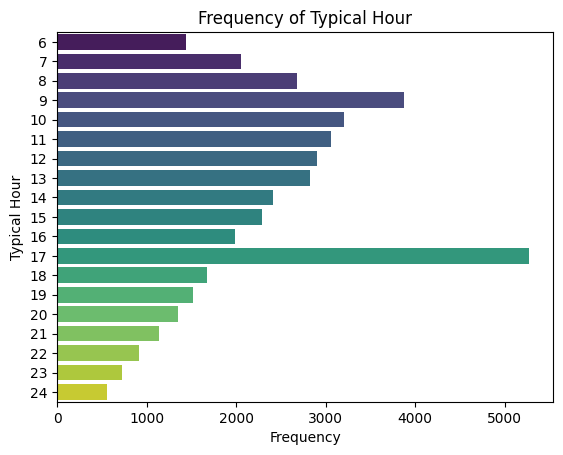

In [13]:
filtered_data = customer_info.dropna(subset=['typical_hour'])
filtered_data['typical_hour'] = filtered_data['typical_hour'].astype(int)
hour_counts = filtered_data['typical_hour'].value_counts().sort_index()
sns.barplot(x=hour_counts.values, y=hour_counts.index, palette='viridis', orient='h')
plt.title('Frequency of Typical Hour')
plt.xlabel('Frequency')
plt.ylabel('Typical Hour')
plt.show()

Box plots for lifetime spend:

In [15]:
fig = make_subplots(rows=2, cols=5,horizontal_spacing=0.1, vertical_spacing=0.2,
                    column_widths=[2, 2, 2, 2, 2],
                    row_heights=[2,2])

fig.add_trace(go.Box(y=customer_info['lifetime_spend_groceries'], orientation='v', name=''), row=1, col=1)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_electronics'], orientation='v',name=''), row=1, col=2)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_vegetables'], orientation='v', name=''), row=1, col=3)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_nonalcohol_drinks'], orientation='v', name=''), row=1, col=4)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_alcohol_drinks'], orientation='v', name=''), row=1, col=5)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_meat'], orientation='v',name=''), row=2, col=1)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_fish'], orientation='v', name=''), row=2, col=2)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_hygiene'], orientation='v', name=''), row=2, col=3)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_petfood'], orientation='v', name=''), row=2, col=4)
fig.add_trace(go.Box(y=customer_info['lifetime_spend_videogames'], orientation='v', name=''), row=2, col=5)

fig.update_layout(
    title='Lifetime Spendings',
    xaxis_title='groceries',
    xaxis2_title='electronics',
    xaxis3_title='vegetables',
    xaxis4_title='nonalcohol_drinks',
    xaxis5_title='alcohol_drinks',
    xaxis6_title='meat',
    xaxis7_title='fish',
    xaxis8_title='hygiene',
    xaxis9_title='petfood',
    xaxis10_title='videogames',
    yaxis_title='Money spent',
    showlegend=False,
    title_x = 0.5
)

# Show the figure
fig.show()

We can see so many outliers.I will make a decision on how to deal with them going forward.

###Feature transformation and creation

We will create new variables(and transform some) and during the process we will continue to seek to understand the data with relevant visualizations.

Age is essential for this type of analysis:

In [16]:
customer_info['customer_birthdate'] = pd.to_datetime(customer_info['customer_birthdate'])

<ipython-input-16-d91ae67ff52a>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



We consider the date '1/05/2024' to calculate the Age:

In [17]:
timedelta = pd.to_datetime(
    '2024-05-01 00:00:00'
) - customer_info['customer_birthdate']

In [18]:
customer_info['Age'] = timedelta.dt.days // 365   # // do the whole division
#When a person is 30.99(almost 31); we say they are 30 years old
customer_info.drop(columns = 'customer_birthdate', inplace = True)

In [19]:
fig = go.Figure()
fig.add_trace(go.Box(y=customer_info['Age'], orientation='v'))
fig.show()

This dataset focuses on individuals aged 22 and over, an age considered significant as it marks the beginning of a phase of life in which an increase in financial expenses is expected. The parents of children and teenagers(>22) are the ones who do the household shopping, which is why columns that highlight the existence of both are important.

Let's create bins for the Age variable to make some visualizations. With values between 22 and 88, we will create 7 classes, one for each decade(despite the existing rules for choosing the number of bins, each analysis is different and in this case what makes the most sense is to divide the data approximately every 10 years)

In [20]:
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

customer_info['AgeGroup'] = pd.cut(customer_info['Age'], bins=age_bins, labels=age_labels, right=False)

Previously it was possible to observe that 'loyalty_card_number' column has a large amount of missing values. Anyone who does not have a card does not have an associated card number. As the card number alone will not provide us with any meaningful information, we will transform the column to binary, indicating 1 if you have a card and 0 if you don't.

In [21]:
#Creates a new column 'loyalty_card' with 1 where 'loyalty_card_number' is not null and 0 where it is null
customer_info['loyalty_card'] = customer_info['loyalty_card_number'].notnull().astype(int)

#Remove the old column
customer_info.drop(columns=['loyalty_card_number'], inplace=True)

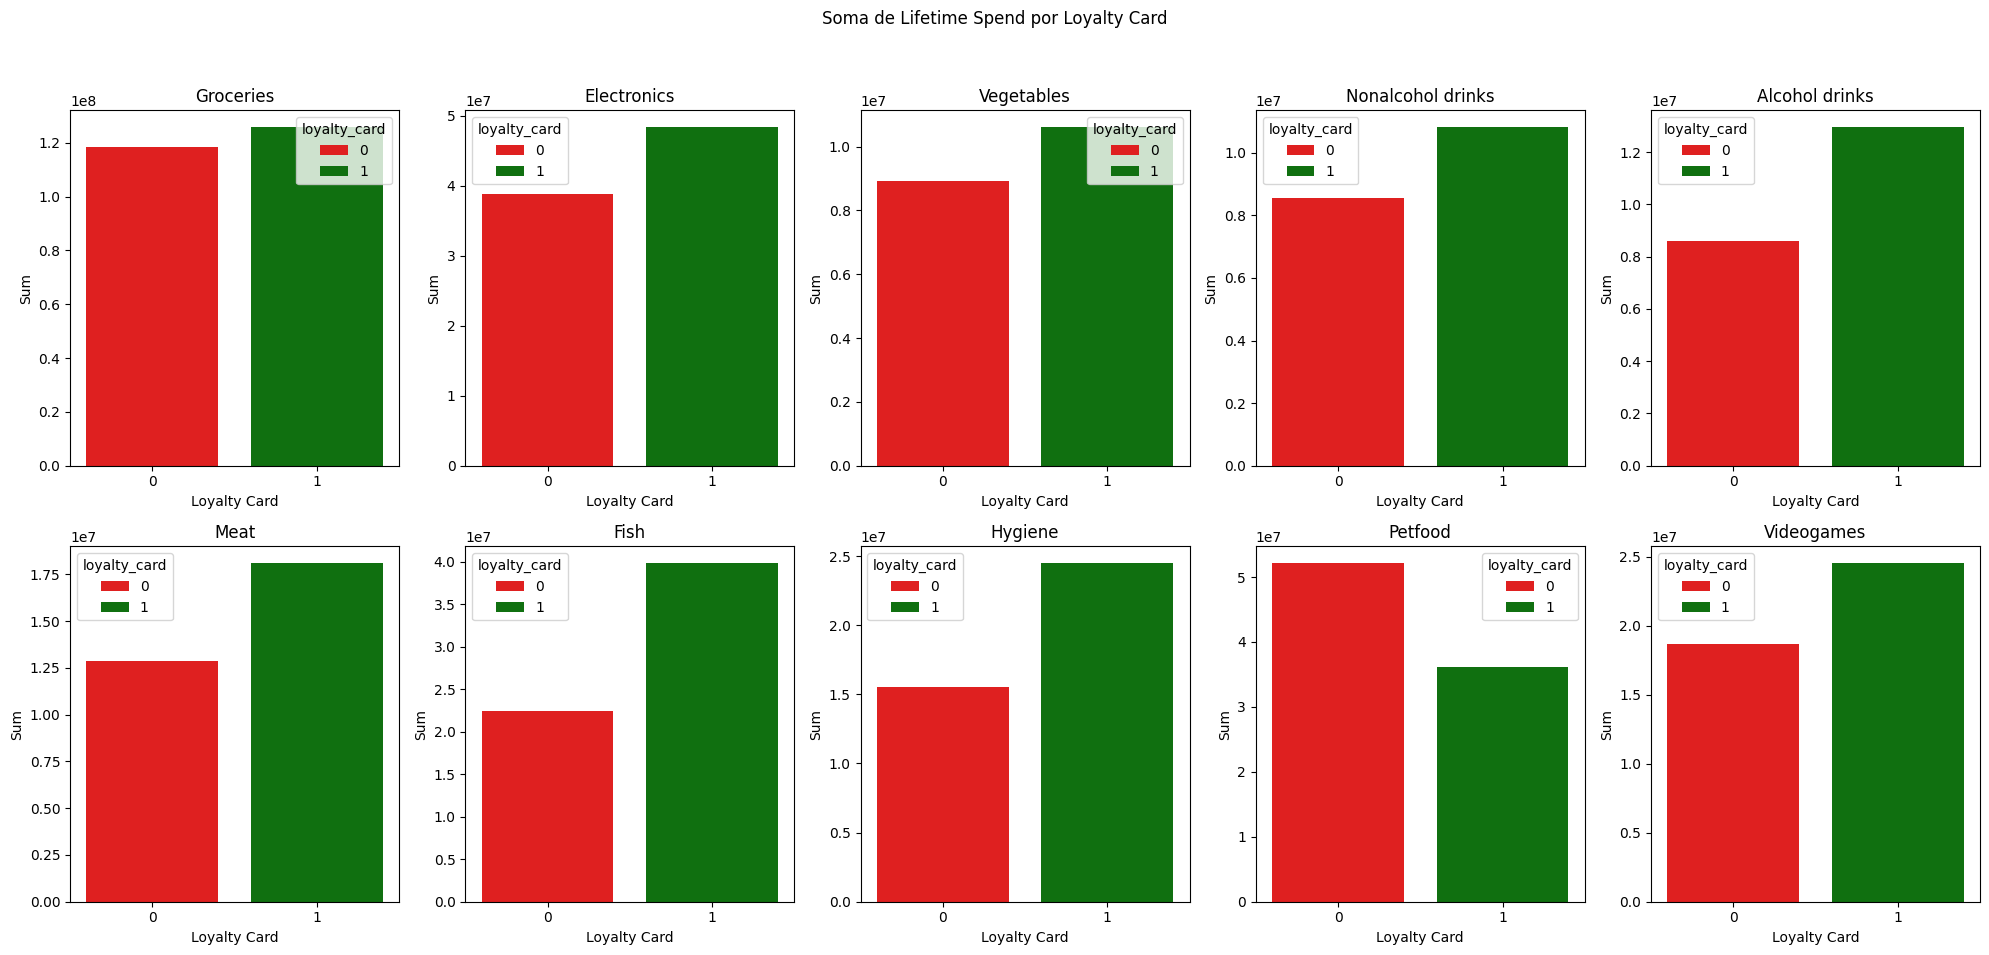

In [22]:
lifetime_spend = customer_info[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks'
,'lifetime_spend_alcohol_drinks','lifetime_spend_meat','lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_petfood','lifetime_spend_videogames']]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Soma de Lifetime Spend por Loyalty Card')

columns = lifetime_spend.columns

for col, ax in zip(columns, axes.flatten()):
    grouped_data = customer_info.groupby('loyalty_card')[col].sum().reset_index()
    sns.barplot(x='loyalty_card', y=col, hue='loyalty_card', data=grouped_data, ax=ax, palette={0: 'red', 1: 'green'})
    ax.set_title(col.replace('lifetime_spend_', '').replace('_', ' ').capitalize())
    ax.set_xlabel('Loyalty Card')
    ax.set_ylabel('Sum')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

It is possible to conclude that customers with a loyalty card, compared to those who do not have one, spend more money in all categories except pet food, with a quite contradictory trend being visible. It could be a good opportunity to create campaigns/promotions

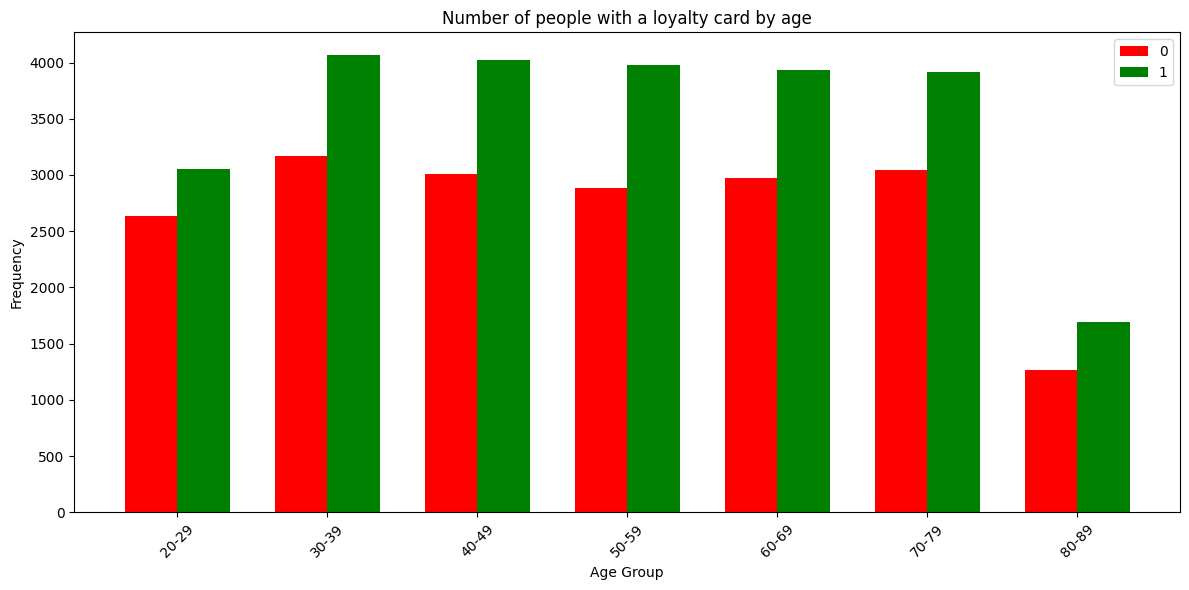

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

frequency = customer_info.groupby(['AgeGroup', 'loyalty_card']).size().unstack(fill_value=0)
bar_width = 0.35
index = range(len(frequency))

bars0 = ax.bar(index, frequency[0], bar_width, label='0', color='red')
bars1 = ax.bar([i + bar_width for i in index], frequency[1], bar_width, label='1', color='green')

ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')
ax.set_title('Number of people with a loyalty card by age')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(frequency.index, rotation=45)
ax.legend()

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

The columns have a balanced distribution in relation to the proportion between values 0 and 1. As in the last visualization we observed that people with loyalty cards spent more, using strategies that positively influence the registration of more people will have a positive impact on companies' profits , especially if we target younger customers, who are more likely to stay with us longer

Let's create a new variable called years_since_first_purchase that can indicate brand loyalty and drop 'year_first_transaction',It's more intuitive

In [24]:
customer_info['years_since_first_purchase'] = 2024 - customer_info['year_first_transaction']
customer_info.drop(columns = 'year_first_transaction', inplace = True)

In [74]:
customer_info[['Age','years_since_first_purchase']].corr()

Age  years_since_first_purchase
Age                         1.000000                    0.523082
years_since_first_purchase  0.523082                    1.000000

Makes sense

Let's pass the encoding of the custom gender variable:

In [25]:
customer_info['male'] = pd.get_dummies(customer_info['customer_gender'], drop_first=True, dtype=int)['male']
customer_info.drop(columns = 'customer_gender', inplace = True)

We decided to remove the name variable for the simple reason that it did not bring us any value to the study.

In [26]:
customer_info.drop(columns = 'customer_name', inplace = True)

It is no longer necessary:

In [ ]:
customer_info.drop(columns = 'AgeGroup',inplace = True)


Now we have all the variables numerical

A dataset limited above in these variables and another without this type of approach:

In [27]:
number_kids = customer_info.groupby(by = 'kids_home').size()
print(number_kids)
print('\n')
number_teens = customer_info.groupby(by = 'teens_home').size()
print(number_teens)
print('\n')
distinct_stores = customer_info.groupby(by = 'distinct_stores_visited').size()
print(distinct_stores)
print('\n')
number_complaints = customer_info.groupby(by = 'number_complaints').size()
print(number_complaints)

kids_home
0.0    12647
1.0    23779
2.0     2543
3.0     1393
4.0     1186
5.0      867
6.0      439
7.0      185
8.0       54
9.0       14
dtype: int64


teens_home
0.0    15587
1.0    20585
2.0     4255
3.0     1748
4.0      389
5.0       45
6.0        1
dtype: int64


distinct_stores_visited
1.0    25338
2.0    10093
3.0     4000
4.0     1761
5.0      752
6.0      304
7.0       68
8.0        6
dtype: int64


number_complaints
0.0    15591
1.0    24908
2.0     2277
3.0       75
4.0       51
5.0       40
6.0       18
7.0        7
8.0        8
9.0        2
dtype: int64


In [28]:
customer_info2 = customer_info.copy()

In [29]:
customer_info['kids_home'] = customer_info['kids_home'].clip(upper=4)
customer_info['teens_home'] = customer_info['teens_home'].clip(upper=4)
customer_info['distinct_stores_visited'] = customer_info['distinct_stores_visited'].clip(upper=4)
customer_info['number_complaints'] = customer_info['number_complaints'].clip(upper=3)

###Missing values input

We need to impute these NA:

In [75]:
percentage_missing_values.sort_values()

kids_home                     1.200981
number_complaints             1.498934
lifetime_spend_vegetables     2.000871
teens_home                    2.340079
distinct_stores_visited       3.000160
lifetime_spend_fish           3.000160
typical_hour                  3.999450
loyalty_card_number          43.494305
dtype: float64

Creating 2 copies:

In [34]:
data = customer_info.copy()

In [35]:
data2 = customer_info2.copy()

In [38]:
scores1 = {}
scores2 = {}
data['distinct_stores_visited'] = data['distinct_stores_visited'] -1 #so entre com label 0 no model dense
columns_with_na = ['kids_home','number_complaints','lifetime_spend_vegetables',
                   'teens_home','distinct_stores_visited','lifetime_spend_fish','typical_hour']
for i in range (7): #one run per variable
  column = columns_with_na[i]
  print(column)

  columns_to_drop = columns_with_na[i+1:]  #in each iteration, we will use all data that has already been imputed

  clean_data = data.drop(columns = columns_to_drop)

  missing_data_var = clean_data[clean_data[column].isnull()] #with NA
  no_missing_data_var = clean_data[clean_data[column].notnull()] #without NA

  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
  scaler = RobustScaler().fit(X_train)
  X_train_scl_st = scaler.transform(X_train)
  X_train_scl_st = pd.DataFrame(X_train_scl_st, columns = X_train.columns).set_index(X_train.index) #scaled

  X_test_scl_st = scaler.transform(X_test)
  X_test_scl_st = pd.DataFrame(X_test_scl_st, columns = X_test.columns).set_index(X_test.index)

#data with labels
  if column == 'kids_home' or column == 'number_complaints' or column == 'teens_home' or column == 'distinct_stores_visited':
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(y_train.nunique(), activation='softmax')  # Output layer with one neuron for each class the column has
        ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #accuracy to optimize
    model.fit(X_train_scl_st, y_train, epochs=50, batch_size=32, validation_split=0.2)
    train_loss, train_accuracy = model.evaluate(X_train_scl_st, y_train)
    test_loss, test_accuracy = model.evaluate(X_test_scl_st, y_test)
    scores1[column] = [train_accuracy, test_accuracy]
    print(scores1)

  else:
    param_grid = {'n_neighbors': [5,11,17,23,29,35,41,46,51,56,61]}
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2') #5 crosso validations
    grid_search.fit(X_train_scl_st, y_train)
    best_k = grid_search.best_params_['n_neighbors']
    model = KNeighborsRegressor(n_neighbors=best_k)
    model.fit(X_train_scl_st,y_train)
    y_train_pred = model.predict(X_train_scl_st)
    y_test_pred = model.predict(X_test_scl_st)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test,y_test_pred)
    scores2[column] = [r2_train,r2_test]
    print(scores2)


  missing_data_var
  X_missing = missing_data_var.drop(columns = column)
  X_missing_scl_st = scaler.transform(X_missing)
  X_missing_scl_st = pd.DataFrame(X_missing_scl_st, columns=X_missing.columns).set_index(X_missing.index)

  y_missing_pred_prob = model.predict(X_missing_scl_st)
  if column == 'kids_home' or column == 'number_complaints' or column == 'teens_home' or column == 'distinct_stores_visited':
    y_missing_pred_classes = y_missing_pred_prob.argmax(axis=1) #round to the nearest class
    missing_data_var.loc[missing_data_var[column].isna(), column] = y_missing_pred_classes
    if column == 'distinct_stores_visited':
      data.update(missing_data_var)  #update the NA
      data['distinct_stores_visited'] = data['distinct_stores_visited'] + 1  #add one to all values
  else:
    missing_data_var.loc[missing_data_var[column].isna(), column] = y_missing_pred_prob
    data.update(missing_data_var) #update the NA


kids_home
Epoch 1/50
755/755 [==============================] - 3s 3ms/step - loss: 0.8138 - accuracy: 0.6624 - val_loss: 0.6908 - val_accuracy: 0.7173
Epoch 2/50
755/755 [==============================] - 2s 3ms/step - loss: 0.6593 - accuracy: 0.7242 - val_loss: 0.6590 - val_accuracy: 0.7226
Epoch 3/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6379 - accuracy: 0.7281 - val_loss: 0.6475 - val_accuracy: 0.7229
Epoch 4/50
755/755 [==============================] - 2s 3ms/step - loss: 0.6277 - accuracy: 0.7312 - val_loss: 0.6407 - val_accuracy: 0.7244
Epoch 5/50
755/755 [==============================] - 3s 4ms/step - loss: 0.6207 - accuracy: 0.7346 - val_loss: 0.6380 - val_accuracy: 0.7279
Epoch 6/50
755/755 [==============================] - 2s 3ms/step - loss: 0.6159 - accuracy: 0.7357 - val_loss: 0.6341 - val_accuracy: 0.7253
Epoch 7/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6116 - accuracy: 0.7372 - val_loss: 0.6328 - val_accuracy: 0.7

Initially, I wanted to use the Neural Network for continuous data but the model did not perform well. It presented a very high mse which suggested research in other ways.

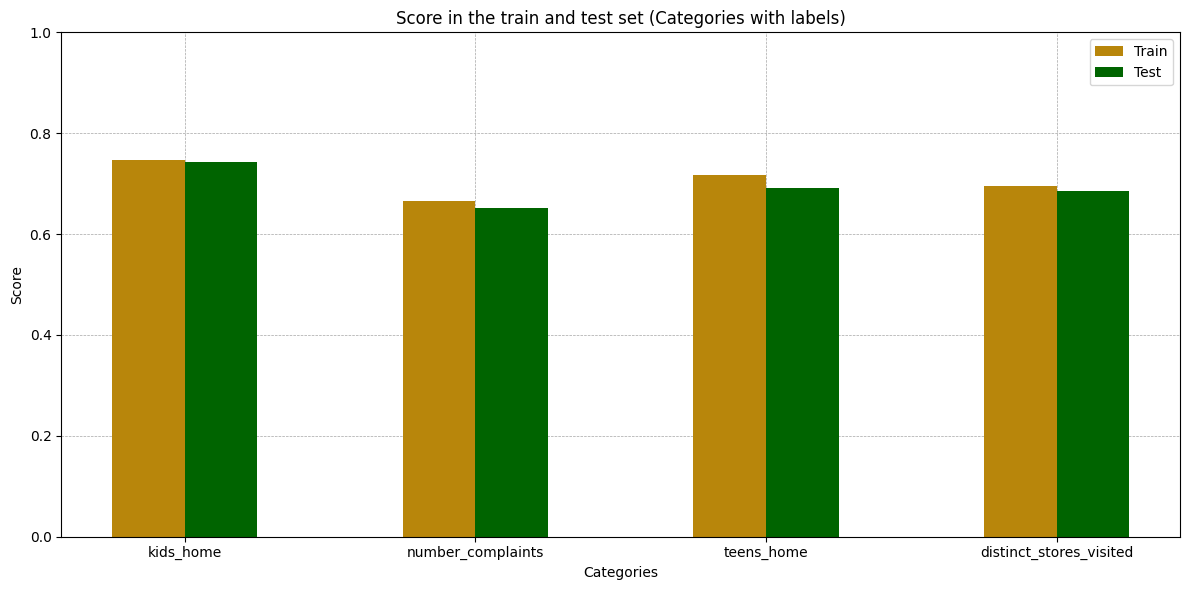

In [52]:
Categories = list(scores1.keys())
score = np.array(list(scores1.values()))

bar_width = 0.25
x = np.arange(len(Categories))

fig, ax = plt.subplots(figsize=(12, 6))


bar1 = ax.bar(x - bar_width/2, score[:, 0], bar_width, label='Train', color = 'darkgoldenrod')
bar2 = ax.bar(x + bar_width/2, score[:, 1], bar_width, label='Test', color = 'darkgreen')

ax.set_xlabel('Categories')
ax.set_ylabel('Score')
ax.set_title('Score in the train and test set (Categories with labels)')
ax.set_xticks(x)
ax.set_ylim(0, 1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
ax.set_axisbelow(True)
ax.legend(loc='upper right')
ax.set_xticklabels(Categories)
plt.tight_layout()
plt.show()

Good results.

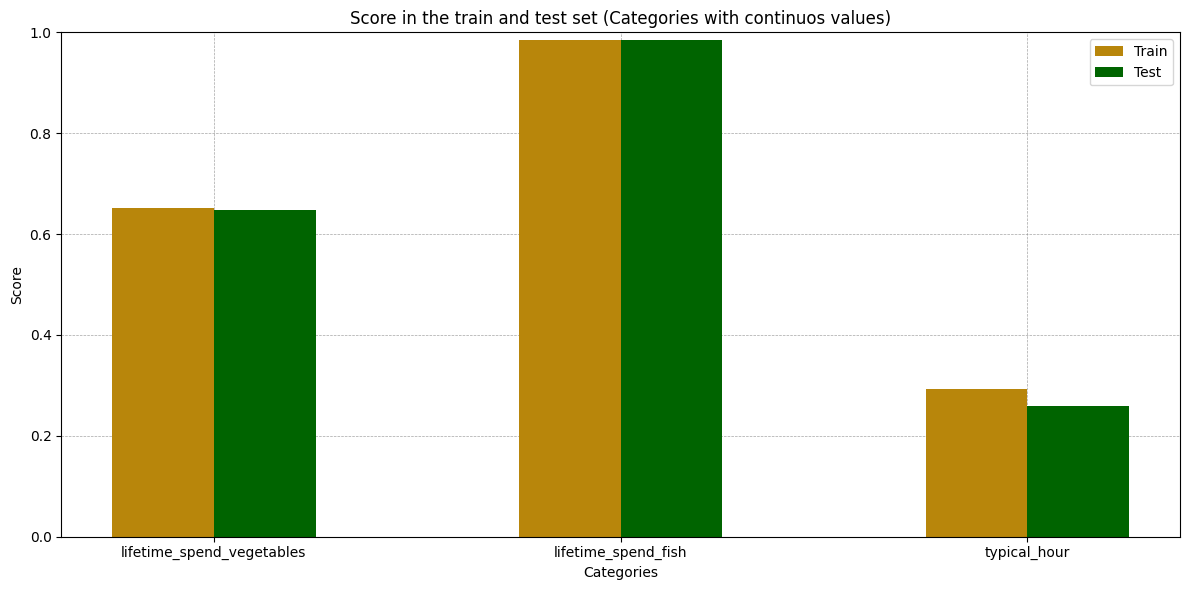

In [54]:
Categories = list(scores2.keys())
score = np.array(list(scores2.values()))

bar_width = 0.25
x = np.arange(len(Categories))

fig, ax = plt.subplots(figsize=(12, 6))


bar1 = ax.bar(x - bar_width/2, score[:, 0], bar_width, label='Train', color = 'darkgoldenrod')
bar2 = ax.bar(x + bar_width/2, score[:, 1], bar_width, label='Test', color = 'darkgreen')

ax.set_xlabel('Categories')
ax.set_ylabel('Score')
ax.set_title('Score in the train and test set (Categories with continuos values)')
ax.set_xticks(x)
ax.set_ylim(0, 1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
ax.set_axisbelow(True)
ax.legend(loc='upper right')
ax.set_xticklabels(Categories)
plt.tight_layout()
plt.show()

Keep the data in typical hour because I think that leaving the data like this will not impact the work as much as a complete removal of the rows would.

We will imput the NA with KNN inputer in the second dataset

In [41]:
imputer = KNNImputer(n_neighbors=12)

# Aplique o imputador aos dados
imputed_data = imputer.fit_transform(data2)

# Converta de volta para DataFrame
data_2 = pd.DataFrame(imputed_data, columns=data2.columns,index=data2.index)


###Feature selection

In [56]:
correlation_matrix = data[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks'
,'lifetime_spend_alcohol_drinks','lifetime_spend_meat','lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_petfood','lifetime_spend_videogames']].corr(method='spearman')

lifetime_spend_groceries  \
lifetime_spend_groceries                          1.000000   
lifetime_spend_electronics                        0.452277   
lifetime_spend_vegetables                         0.104414   
lifetime_spend_nonalcohol_drinks                  0.414485   
lifetime_spend_alcohol_drinks                     0.091003   
lifetime_spend_meat                               0.443418   
lifetime_spend_fish                               0.485620   
lifetime_spend_hygiene                            0.318827   
lifetime_spend_petfood                            0.694094   
lifetime_spend_videogames                         0.353781   

                                  lifetime_spend_electronics  \
lifetime_spend_groceries                            0.452277   
lifetime_spend_electronics                          1.000000   
lifetime_spend_vegetables                           0.215280   
lifetime_spend_nonalcohol_drinks                    0.328351   
lifetime_spend_alcohol_drinks                       0.545013   
lifetime_spend_meat                                 0.656626   
lifetime_spend_fish                                 0.648538   
lifetime_spend_hygiene                              0.662263   
lifetime_spend_petfood                              0.298090   
lifetime_spend_videogames                           0.745397   

                                  lifetime_spend_vegetables  \
lifetime_spend_groceries                           0.104414   
lifetime_spend_electronics                         0.215280   
lifetime_spend_vegetables                          1.000000   
lifetime_spend_nonalcohol_drinks                  -0.038599   
lifetime_spend_alcohol_drinks                     -0.148522   
lifetime_spend_meat                               -0.085292   
lifetime_spend_fish                               -0.124234   
lifetime_spend_hygiene                             0.161581   
lifetime_spend_petfood                            -0.160337   
lifetime_spend_videogames                          0.121301   

                                  lifetime_spend_nonalcohol_drinks  \
lifetime_spend_groceries                                  0.414485   
lifetime_spend_electronics                                0.328351   
lifetime_spend_vegetables                                -0.038599   
lifetime_spend_nonalcohol_drinks                          1.000000   
lifetime_spend_alcohol_drinks                             0.246830   
lifetime_spend_meat                                       0.427049   
lifetime_spend_fish                                       0.413034   
lifetime_spend_hygiene                                    0.331631   
lifetime_spend_petfood                                    0.470191   
lifetime_spend_videogames                                 0.317581   

                                  lifetime_spend_alcohol_drinks  \
lifetime_spend_groceries                               0.091003   
lifetime_spend_electronics                             0.545013   
lifetime_spend_vegetables                             -0.148522   
lifetime_spend_nonalcohol_drinks                       0.246830   
lifetime_spend_alcohol_drinks                          1.000000   
lifetime_spend_meat                                    0.598875   
lifetime_spend_fish                                    0.633049   
lifetime_spend_hygiene                                 0.608727   
lifetime_spend_petfood                                 0.122250   
lifetime_spend_videogames                              0.638036   

                                  lifetime_spend_meat  lifetime_spend_fish  \
lifetime_spend_groceries                     0.443418             0.485620   
lifetime_spend_electronics                   0.656626             0.648538   
lifetime_spend_vegetables                   -0.085292            -0.124234   
lifetime_spend_nonalcohol_drinks             0.427049             0.413034   
lifetime_spend_alcohol_drinks                0.598875

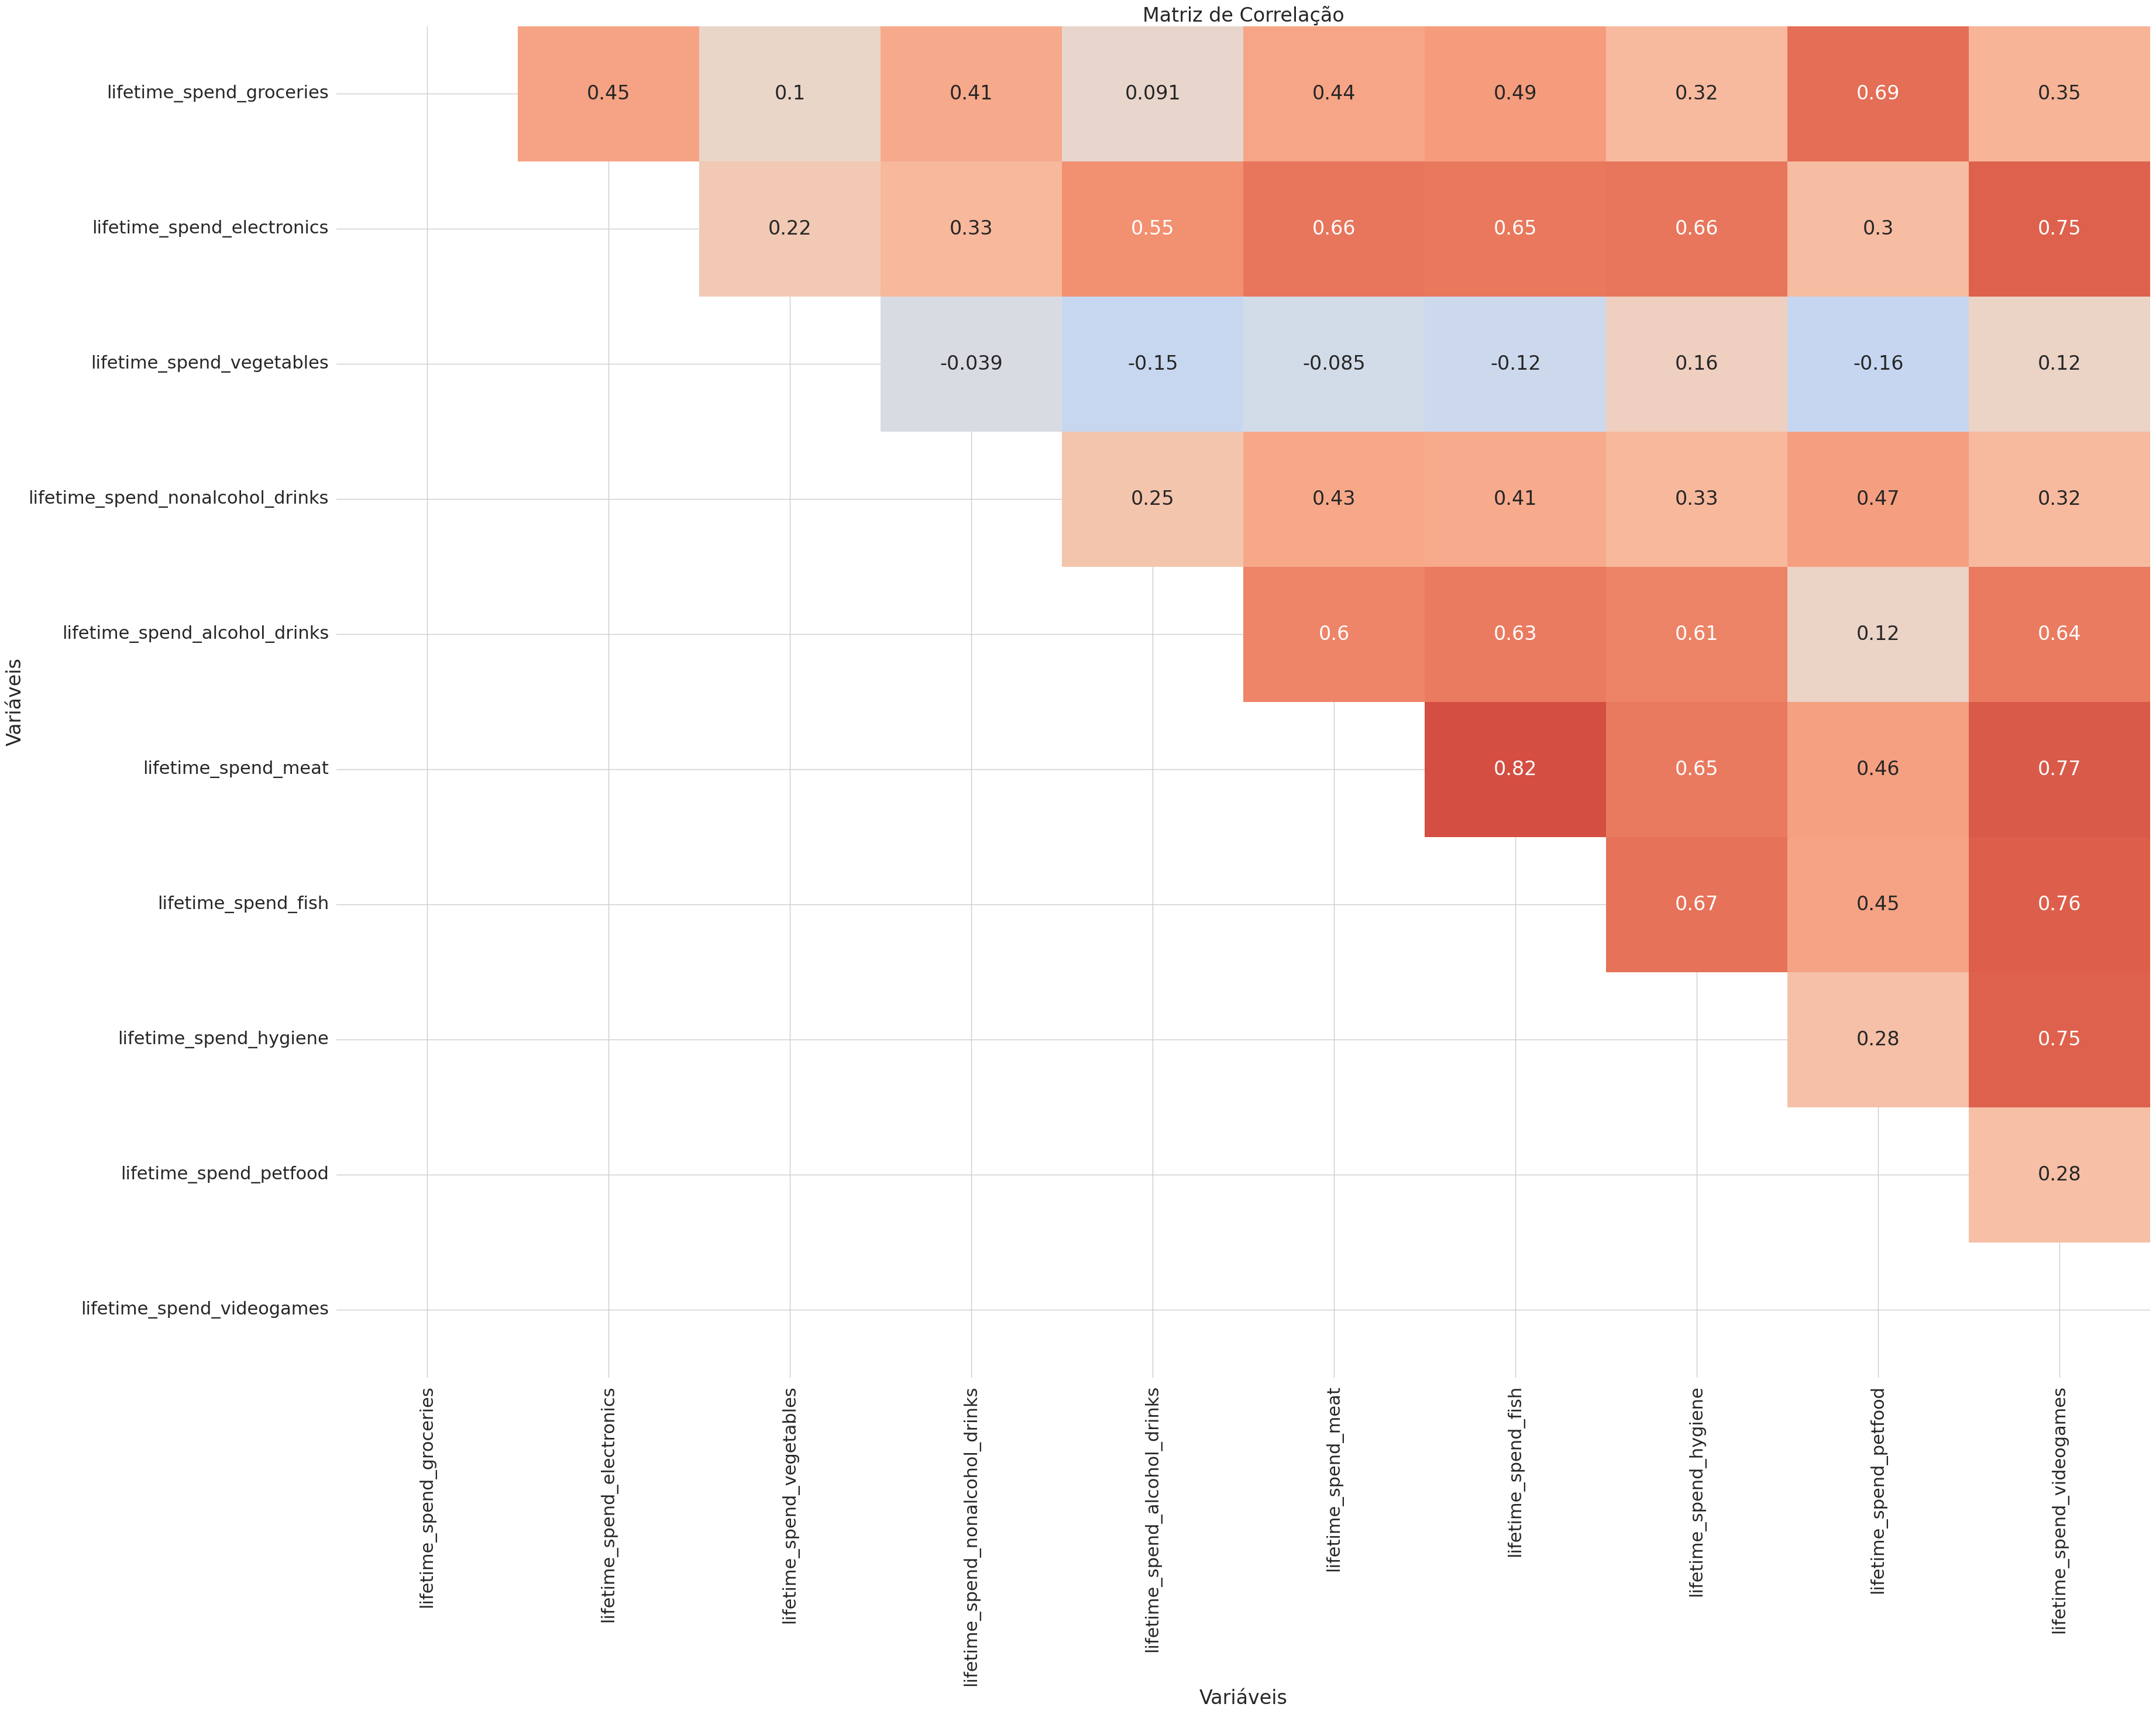

In [57]:
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.set_style("whitegrid")

sns.heatmap(mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

plt.title("Correlation Matrix")

plt.show()

In [58]:
data.drop(columns = 'lifetime_spend_videogames', inplace = True)

For the second dataset:

In [59]:
correlation_matrix = data2[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks'
,'lifetime_spend_alcohol_drinks','lifetime_spend_meat','lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_petfood','lifetime_spend_videogames']].corr(method='spearman')

lifetime_spend_groceries  \
lifetime_spend_groceries                          1.000000   
lifetime_spend_electronics                        0.452277   
lifetime_spend_vegetables                         0.106387   
lifetime_spend_nonalcohol_drinks                  0.414485   
lifetime_spend_alcohol_drinks                     0.091003   
lifetime_spend_meat                               0.443418   
lifetime_spend_fish                               0.485395   
lifetime_spend_hygiene                            0.318827   
lifetime_spend_petfood                            0.694094   
lifetime_spend_videogames                         0.353781   

                                  lifetime_spend_electronics  \
lifetime_spend_groceries                            0.452277   
lifetime_spend_electronics                          1.000000   
lifetime_spend_vegetables                           0.217009   
lifetime_spend_nonalcohol_drinks                    0.328351   
lifetime_spend_alcohol_drinks                       0.545013   
lifetime_spend_meat                                 0.656626   
lifetime_spend_fish                                 0.648521   
lifetime_spend_hygiene                              0.662263   
lifetime_spend_petfood                              0.298090   
lifetime_spend_videogames                           0.745397   

                                  lifetime_spend_vegetables  \
lifetime_spend_groceries                           0.106387   
lifetime_spend_electronics                         0.217009   
lifetime_spend_vegetables                          1.000000   
lifetime_spend_nonalcohol_drinks                  -0.037558   
lifetime_spend_alcohol_drinks                     -0.147826   
lifetime_spend_meat                               -0.084399   
lifetime_spend_fish                               -0.122978   
lifetime_spend_hygiene                             0.162277   
lifetime_spend_petfood                            -0.159416   
lifetime_spend_videogames                          0.122411   

                                  lifetime_spend_nonalcohol_drinks  \
lifetime_spend_groceries                                  0.414485   
lifetime_spend_electronics                                0.328351   
lifetime_spend_vegetables                                -0.037558   
lifetime_spend_nonalcohol_drinks                          1.000000   
lifetime_spend_alcohol_drinks                             0.246830   
lifetime_spend_meat                                       0.427049   
lifetime_spend_fish                                       0.412650   
lifetime_spend_hygiene                                    0.331631   
lifetime_spend_petfood                                    0.470191   
lifetime_spend_videogames                                 0.317581   

                                  lifetime_spend_alcohol_drinks  \
lifetime_spend_groceries                               0.091003   
lifetime_spend_electronics                             0.545013   
lifetime_spend_vegetables                             -0.147826   
lifetime_spend_nonalcohol_drinks                       0.246830   
lifetime_spend_alcohol_drinks                          1.000000   
lifetime_spend_meat                                    0.598875   
lifetime_spend_fish                                    0.632871   
lifetime_spend_hygiene                                 0.608727   
lifetime_spend_petfood                                 0.122250   
lifetime_spend_videogames                              0.638036   

                                  lifetime_spend_meat  lifetime_spend_fish  \
lifetime_spend_groceries                     0.443418             0.485395   
lifetime_spend_electronics                   0.656626             0.648521   
lifetime_spend_vegetables                   -0.084399            -0.122978   
lifetime_spend_nonalcohol_drinks             0.427049             0.412650   
lifetime_spend_alcohol_drinks                0.598875

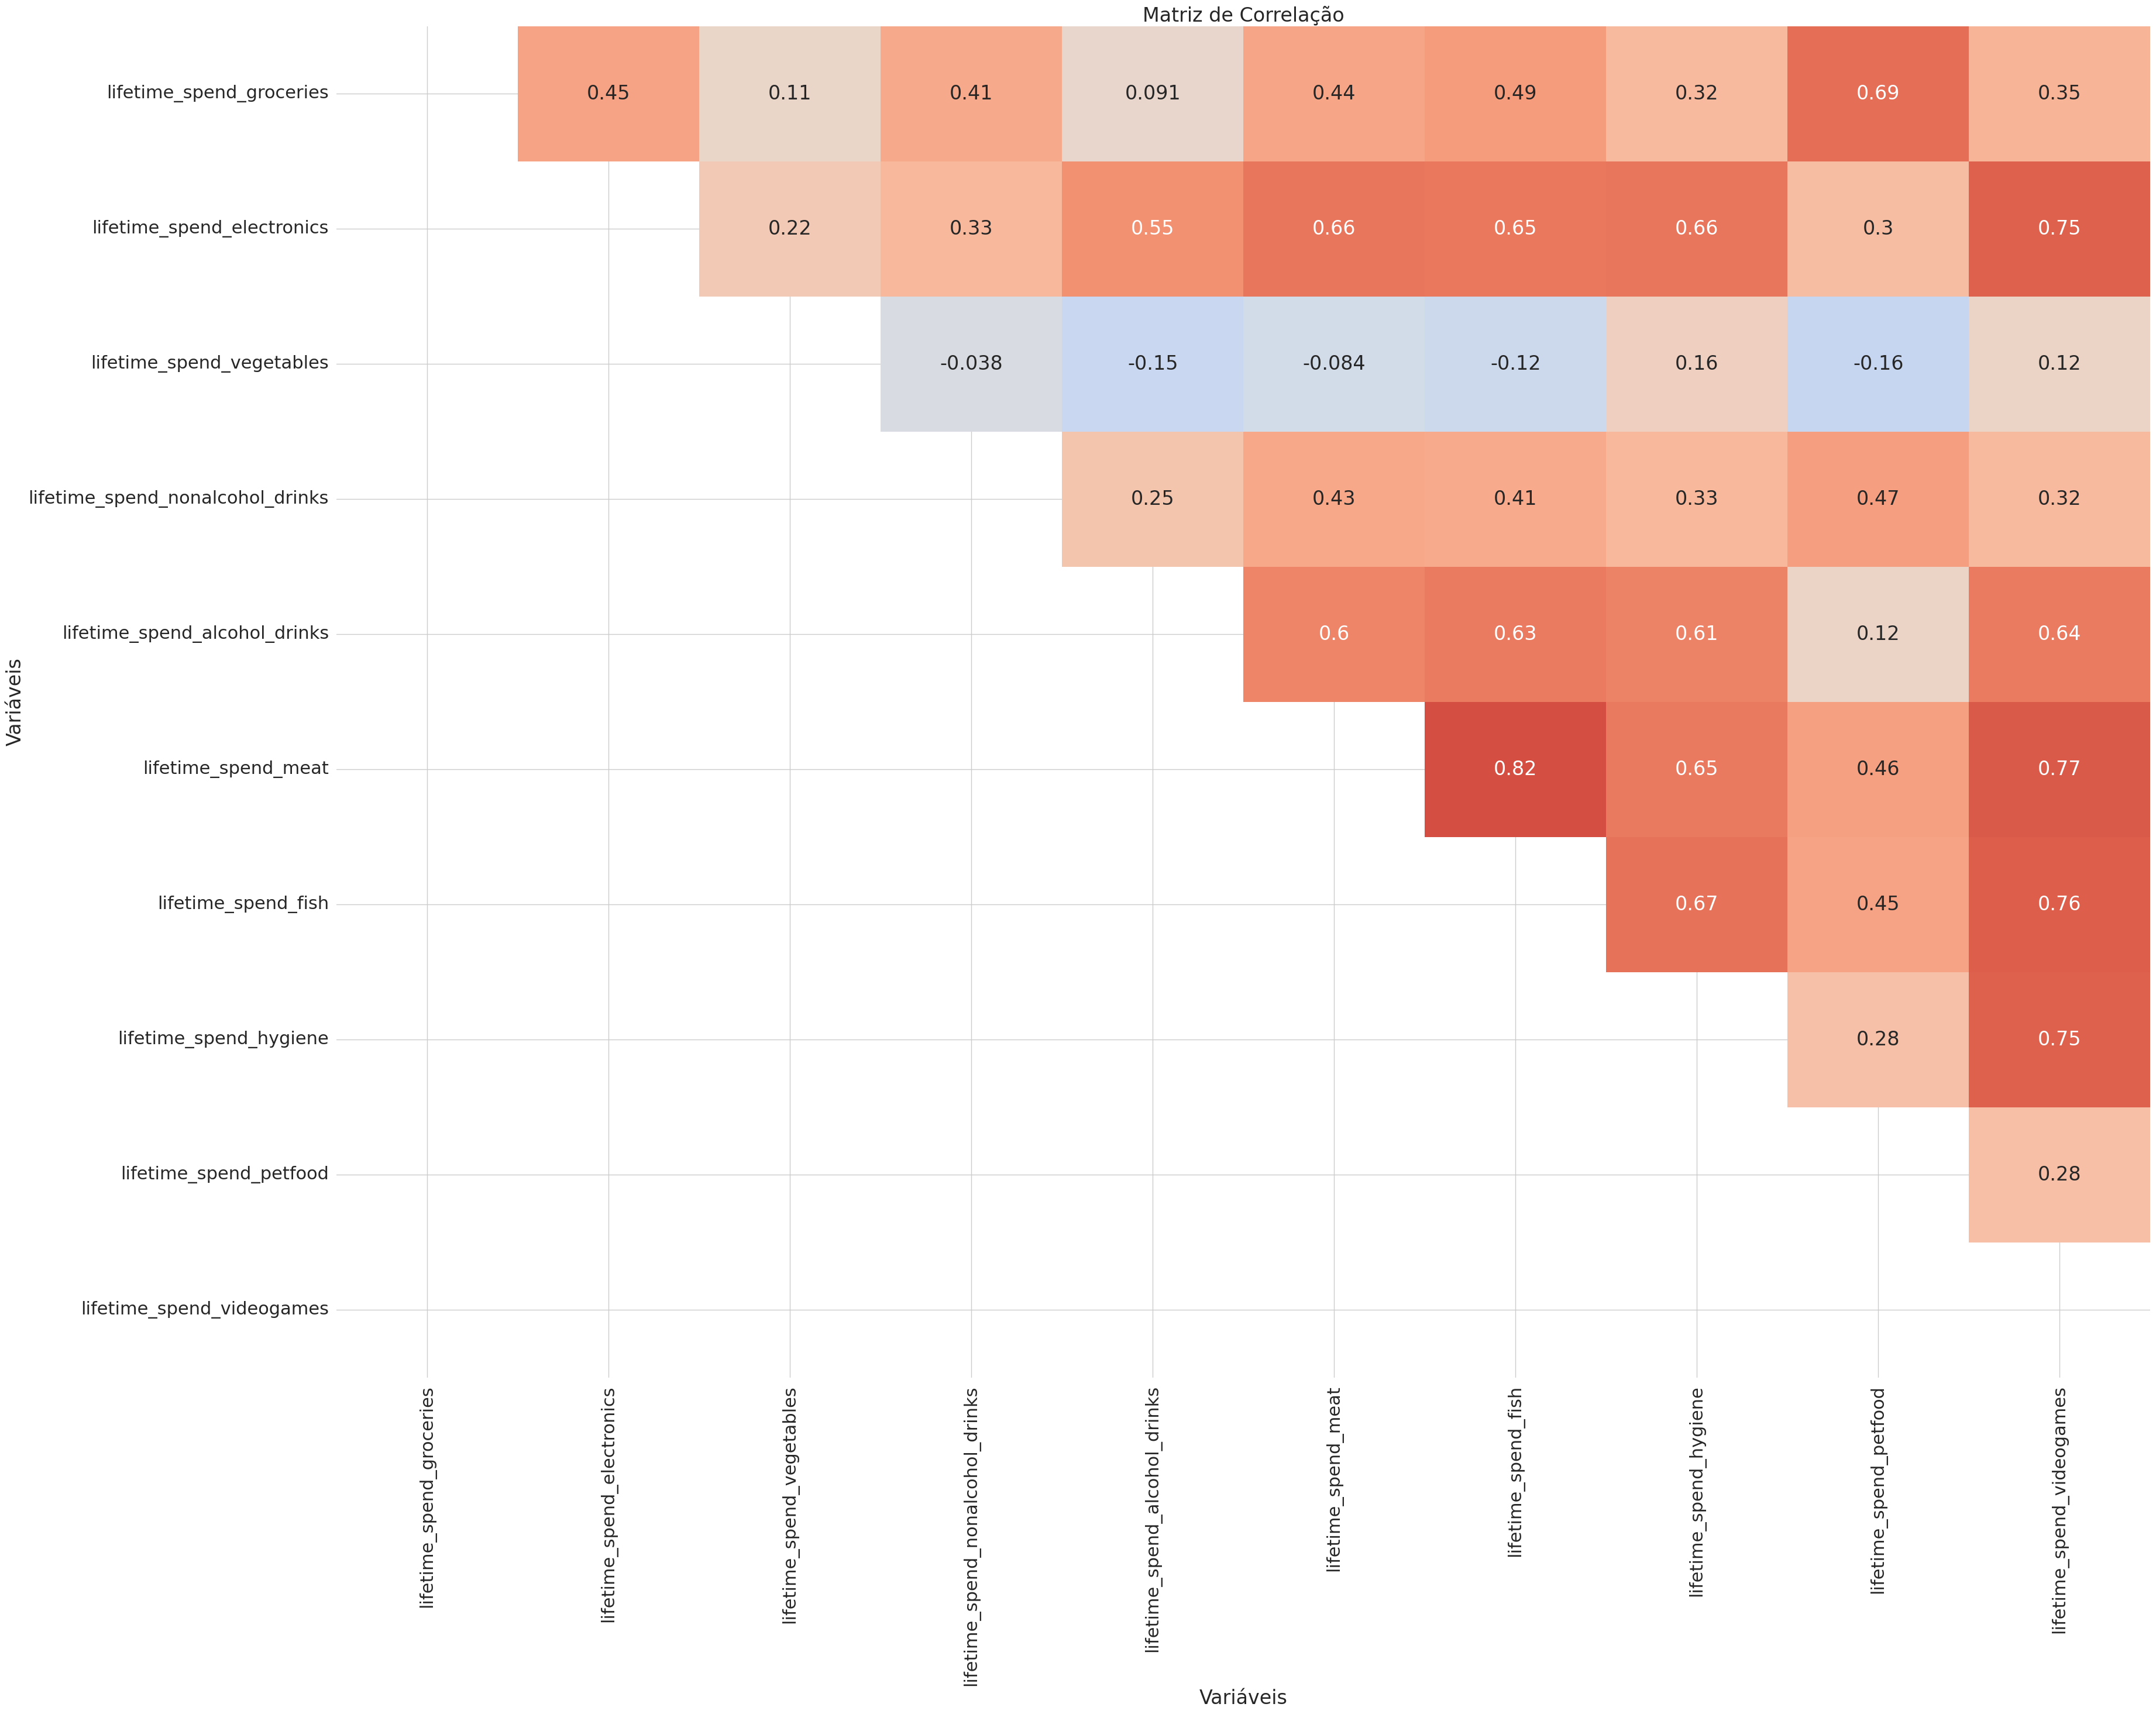

In [60]:
# Criando uma máscara para a matriz triangular inferior
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Configurando o estilo do gráfico
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Gerando o mapa de calor
sns.heatmap(mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Título e rótulos dos eixos
plt.title("Matriz de Correlação")
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")

# Exibindo o gráfico
plt.show()

In [ ]:
data2.drop(columns = 'lifetime_spend_videogames', inplace = True)

Saving the data:

In [ ]:
data.to_csv('data1')

In [6]:
data = pd.read_csv('data1 (2)', index_col = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data2.to_csv('data2')

In [5]:
data2 = pd.read_csv('data2 (1)', index_col = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Segmentation**

Scaling data to data_scaled_rb

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled_rb = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
data_scaled_rb = pd.DataFrame(data_scaled_rb, columns = data.columns).set_index(data.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data_scaled_rb2 = scaler.fit_transform(data2)
data_scaled_rb2 = pd.DataFrame(data_scaled_rb2, columns = data2.columns).set_index(data2.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Autoencoders to Dimensionality Reduction

To dimensionality reduction, I decide to use autoencoders.

In [65]:
X_train, X_test = train_test_split(data_scaled_rb, test_size=0.2, random_state=42) #SPlit the data:

In [66]:
def build_autoencoder(hidden_size, code_size, activation):
    input_layer = Input(shape=(X_train.shape[1],))
    encoding_layer = Dense(hidden_size, activation=activation)(input_layer)
    code = Dense(code_size, activation=activation)(encoding_layer)
    decoding_layer = Dense(hidden_size, activation=activation)(code)
    output_data = Dense(X_train.shape[1], activation='linear')(decoding_layer)
    autoencoder = Model(inputs=input_layer, outputs=output_data)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, input_layer

Parameters to optimize:

In [67]:
hidden_sizes = [8, 14, 18]
code_size = [6,8]
activations = ['relu','tanh']

In [70]:
history_dict = {}

for hidden_size in hidden_sizes:
    for code_size_val in code_size:
        for activation in activations:
            autoencoder, input_layer = build_autoencoder(hidden_size, code_size_val, activation)
            history = autoencoder.fit(X_train, X_train,
                                       epochs=50,
                                       batch_size=16,
                                       shuffle=True,
                                       validation_data=(X_test, X_test),
                                       verbose=0)
            history_dict[(hidden_size, code_size_val, activation)] = history
            print(history_dict)

{(8, 6, 'relu'): <keras.src.callbacks.History object at 0x7f015e1c5bd0>}
{(8, 6, 'relu'): <keras.src.callbacks.History object at 0x7f015e1c5bd0>, (8, 6, 'tanh'): <keras.src.callbacks.History object at 0x7f0151649210>}
{(8, 6, 'relu'): <keras.src.callbacks.History object at 0x7f015e1c5bd0>, (8, 6, 'tanh'): <keras.src.callbacks.History object at 0x7f0151649210>, (8, 8, 'relu'): <keras.src.callbacks.History object at 0x7f01535f9c30>}
{(8, 6, 'relu'): <keras.src.callbacks.History object at 0x7f015e1c5bd0>, (8, 6, 'tanh'): <keras.src.callbacks.History object at 0x7f0151649210>, (8, 8, 'relu'): <keras.src.callbacks.History object at 0x7f01535f9c30>, (8, 8, 'tanh'): <keras.src.callbacks.History object at 0x7f015356d660>}
{(8, 6, 'relu'): <keras.src.callbacks.History object at 0x7f015e1c5bd0>, (8, 6, 'tanh'): <keras.src.callbacks.History object at 0x7f0151649210>, (8, 8, 'relu'): <keras.src.callbacks.History object at 0x7f01535f9c30>, (8, 8, 'tanh'): <keras.src.callbacks.History object at 0x7f

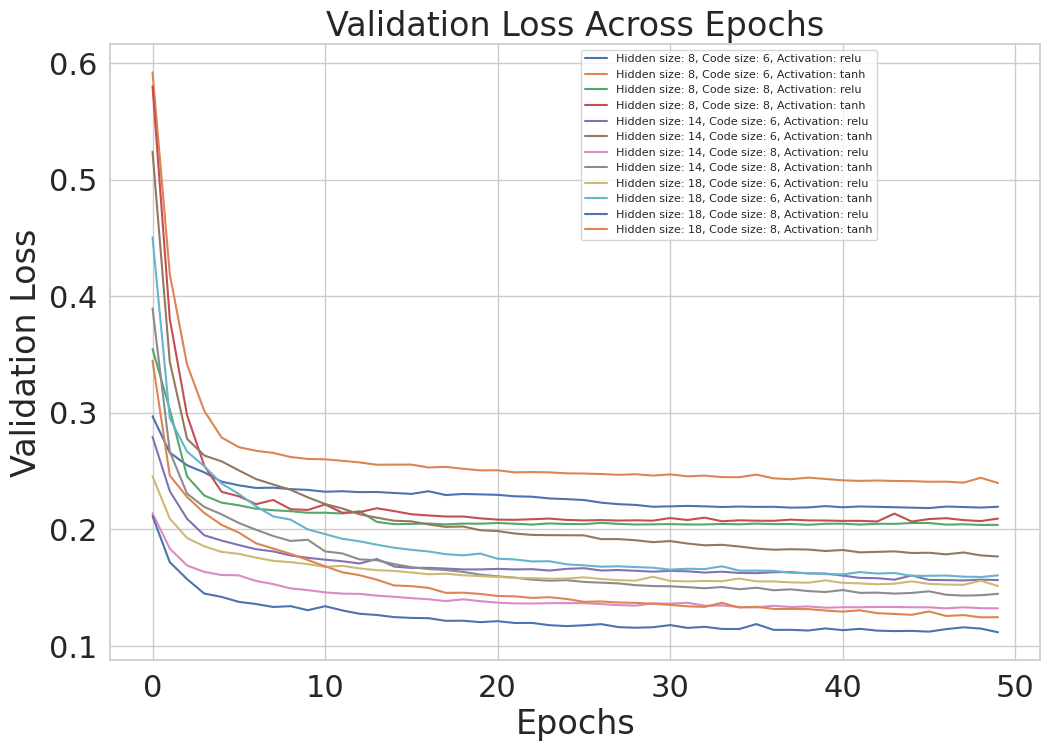

In [87]:
plt.figure(figsize=(12, 8))
color_index = 0

for (hidden_size, code_size, activation), history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'Hidden size: {hidden_size}, Code size: {code_size}, Activation: {activation}', color='C'+str(color_index))
    color_index = (color_index + 1) % 10

plt.title('Validation Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left', prop={'size': 8})
plt.show()



Best parameters :(18, 8, 'relu')

In [78]:
autoencoder,input_layer = build_autoencoder(18, 8, 'relu')

history = autoencoder.fit(X_train, X_train,
                           epochs=30,
                           batch_size=16,
                           shuffle=True,
                           validation_data=(X_test, X_test),
                           verbose=0)

loss = autoencoder.evaluate(X_test, X_test)
print(loss)


273/273 [==============================] - 0s 1ms/step - loss: 0.1182
0.11822135746479034


In [79]:
autoencoder.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_72 (Dense)            (None, 18)                414       
                                                                 
 dense_73 (Dense)            (None, 8)                 152       
                                                                 
 dense_74 (Dense)            (None, 18)                162       
                                                                 
 dense_75 (Dense)            (None, 22)                418       
                                                                 
Total params: 1146 (4.48 KB)
Trainable params: 1146 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
code_layer = autoencoder.layers[2]

encoder = Model(inputs=input_layer, outputs=code_layer.output)

encoded_data = encoder.predict(data_scaled_rb)


1364/1364 [==============================] - 3s 2ms/step


In [83]:
encoded_data = pd.DataFrame(encoded_data, columns = ['encoder_1','encoder_2','encoder_3',
'encoder_4','encoder_5','encoder_6','encoder_7','encoder_8']).set_index(data_scaled_rb.index)

In [84]:
encoded_data.sort_index()

encoder_1  encoder_2  encoder_3  encoder_4  encoder_5  encoder_6  \
customer_id                                                                     
1             7.684056   1.207545   0.987240   0.691117   2.682683   2.714511   
2             7.013631   1.159442   0.907941   0.933702   3.501753   1.949943   
3             1.763953   4.965905   2.827548   4.705861   9.081827   1.789232   
4             2.660382   1.548722   1.901042   1.233486   1.328383   1.700531   
5             1.638461   4.398577   2.348484   1.810742   2.767888   2.029137   
...                ...        ...        ...        ...        ...        ...   
49996         6.785006   0.891868   1.285094   1.386450   5.247097   2.638971   
49997         4.007090   5.503893   0.602421   1.908060   2.835487   1.372956   
49998         1.842923   2.650302   1.882911   2.683464   3.000993   2.113209   
49999         2.641769   3.661859   2.108071   1.582308   2.580033   1.459864   
50000         2.153564   1.839277   1.560113   0.823422   1.435590   1.876301   

             encoder_7  encoder_8  
customer_id                        
1             2.394390   2.669909  
2             2.511388   2.606409  
3             1.578019   1.393991  
4             2.648205   5.154137  
5             2.311707   1.369586  
...                ...        ...  
49996         3.209472   1.040778  
49997         2.211769   2.233442  
49998         1.354872   1.841397  
49999         1.799246   1.732736  
50000         0.660358   2.093143  

[43631 rows x 8 columns]

In [85]:
encoded_data.to_csv('encoded_data1')

In [ ]:
encoded_data = pd.read_csv('encoded_data1',index_col = 0)

###K mean:

Start by making a copy and evaluating the disperson across the number of clusters:

In [10]:
data_kmean_clusters1 = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data_kmean_clusters2 = data2.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
dispersion1 = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled_rb)
    dispersion1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


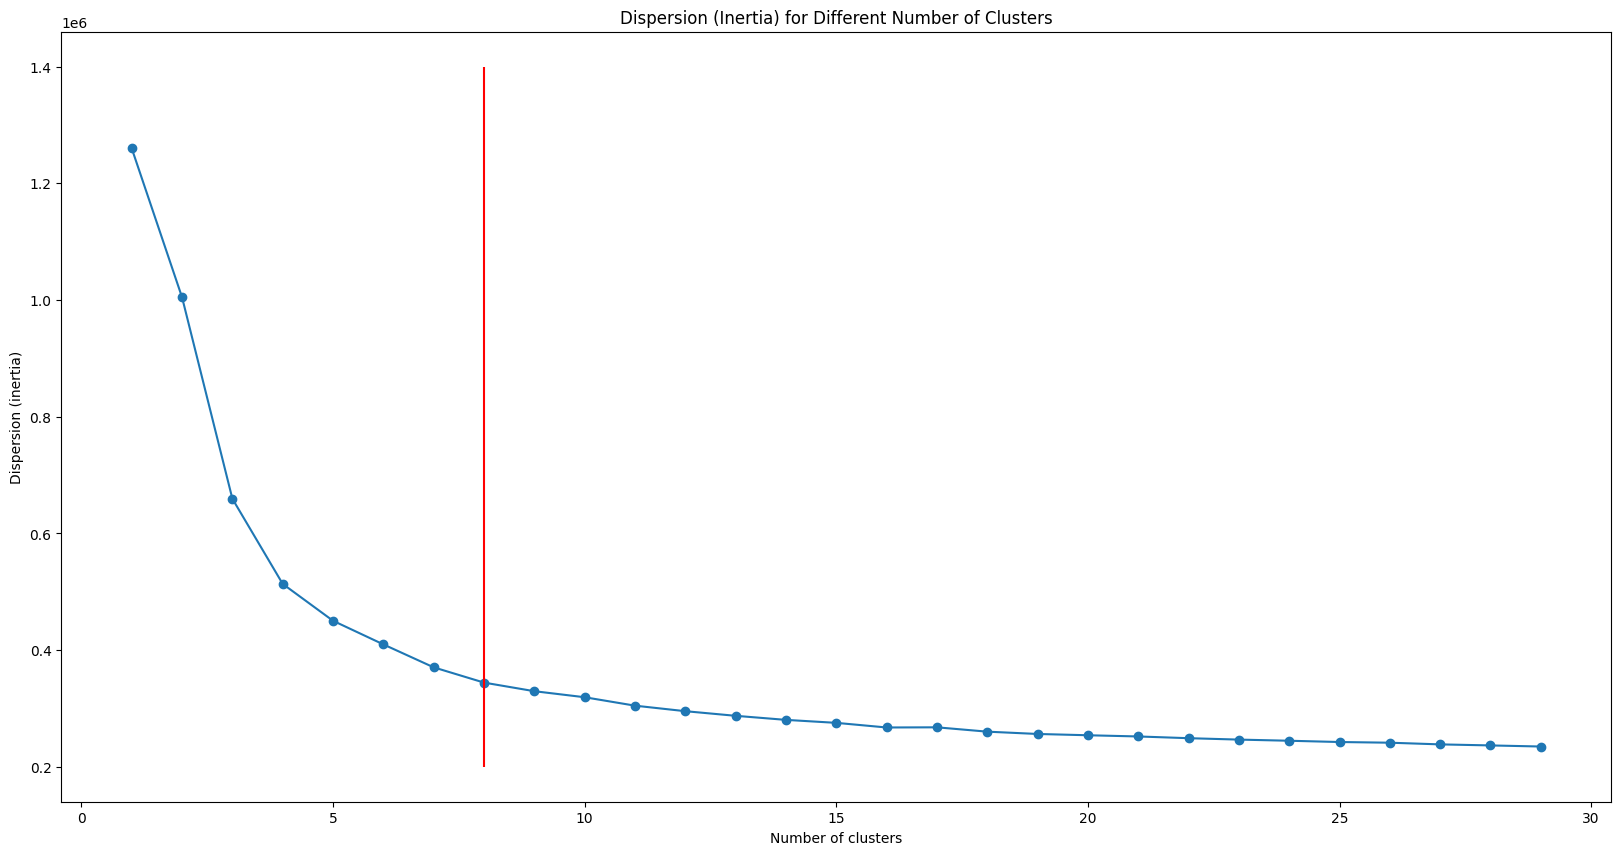

In [62]:
import matplotlib.pyplot as plt

# Plotando a dispersão (inércia) para diferentes números de clusters
plt.figure(figsize=(20, 10))  # Definindo o tamanho da figura
plt.plot(range(1, 30), dispersion1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Dispersion (Inertia) for Different Number of Clusters')
plt.vlines(8, 200000, 1400000, color='red')
plt.show()

In this graph I looked for the elbow, that is, the point at which the inertia no longer decreases so much that it justifies increasing a cluster. Especially in this work where I am prioritizing interpretability, I think that an adequate number of clusters would be between 7 and 9
Ideal number of clusters:8

In [ ]:
dispersion2 = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_kmean2)
    dispersion2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

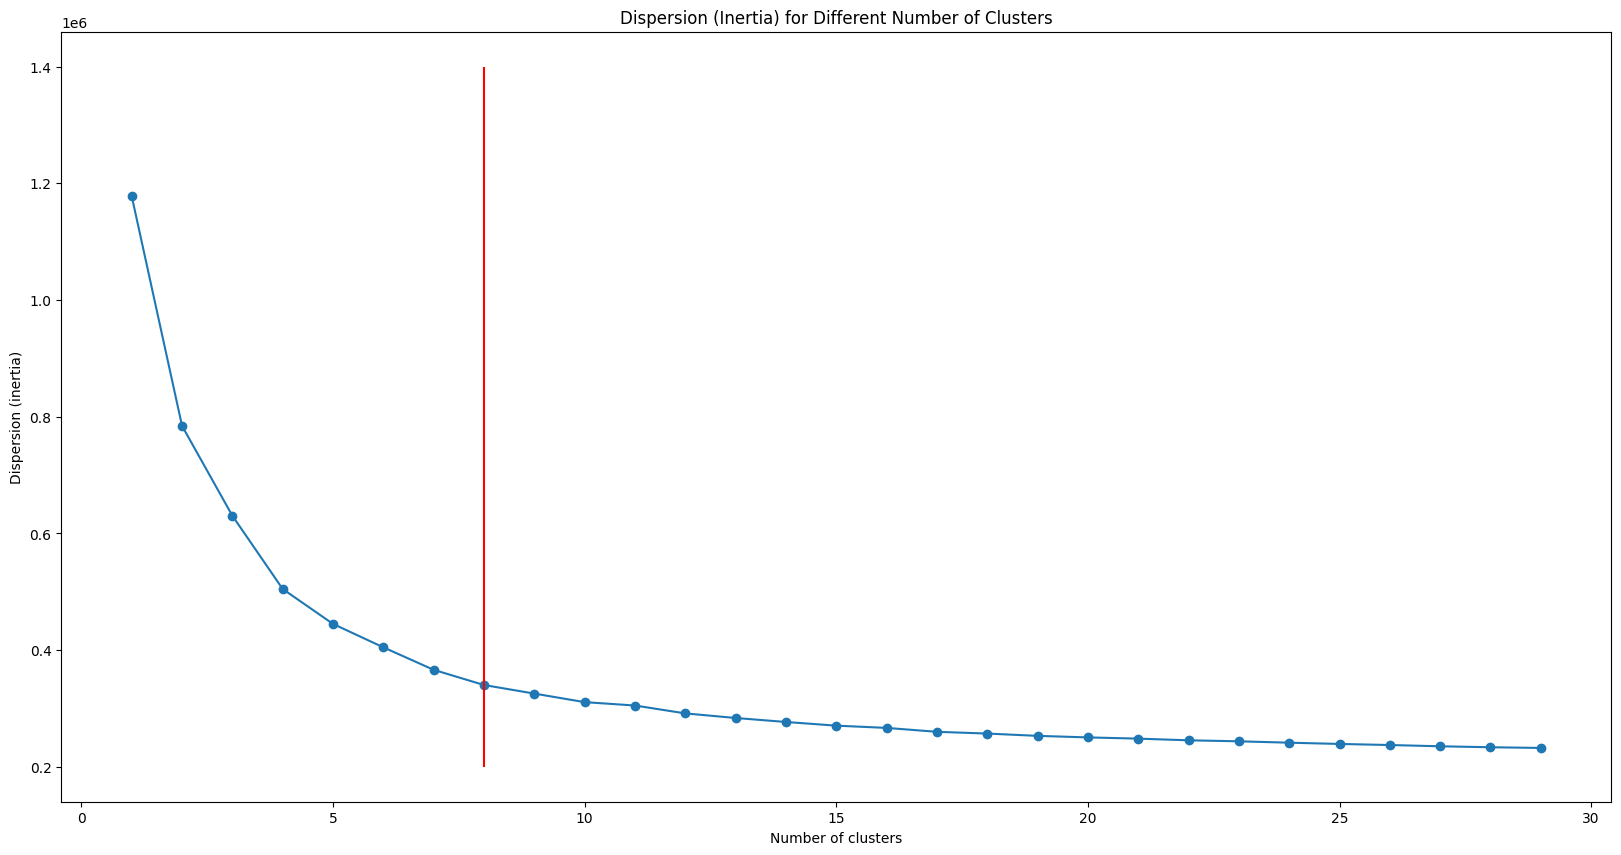

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 30), dispersion2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Dispersion (Inertia) for Different Number of Clusters')
plt.vlines(8, 200000, 1400000, color='red')
plt.show()

The same results. Ideal number of clusters:8

In [12]:
kmeans = KMeans(n_clusters=8, random_state=42).fit( data_scaled_rb )
data_kmean_clusters1['cluster_kmeans'] = kmeans.predict( data_scaled_rb )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
kmeans = KMeans(n_clusters=8, random_state=42).fit( data_scaled_rb2 )
data_kmean_clusters2['cluster_kmeans'] = kmeans.predict( data_scaled_rb2 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


UMAP:

In [17]:
def visualize_dimensionality_reduction(transformation, targets):
  # create a scatter plot of the t-SNE output
  plt.scatter(transformation[:, 0], transformation[:, 1],
              c=np.array(targets).astype(int), cmap=plt.cm.tab10)

  labels = np.unique(targets)

  # create a legend with the class labels and colors
  handles = [plt.scatter([],[], c=plt.cm.tab10(i), label=label) for i, label in enumerate(labels)]
  plt.legend(handles=handles, title='Classes')

  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Separando as características das etiquetas
X_umap_kmeans = data_scaled_rb
y_umap_kmeans = data_kmean_clusters1['cluster_kmeans']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-17-de8723af79ef>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [p

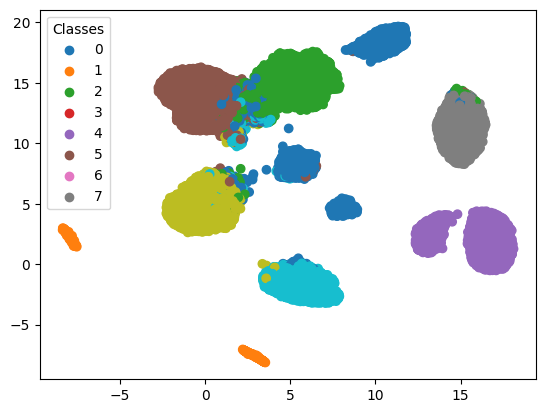

In [20]:
umap_object = umap.UMAP(n_neighbors=40, min_dist=0.5, random_state=42)
umap_embedding = umap_object.fit_transform(X_umap_kmeans)

visualize_dimensionality_reduction(umap_embedding, y_umap_kmeans)



In [21]:
silhouette_score(X_umap_kmeans, y_umap_kmeans)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.2740564799666618

###DBSCAN

DBSCAN and Mean Shift are algorithms that will be tested on both datasets. They handle outliers better than K-means and can bring more value to our model.

In [ ]:
data_dbscan_clusters1 = data.copy()

In [ ]:
data_dbscan_clusters2 = data2.copy()

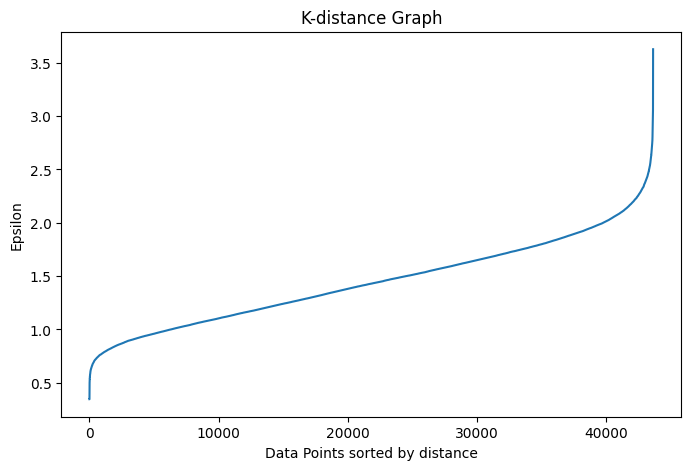

In [ ]:
neigh = NearestNeighbors(n_neighbors=150)
nbrs = neigh.fit(data_scaled_rb2)
distances, _ = nbrs.kneighbors(data_scaled_rb2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

The elbow indicates the transition between dense regions and sparse regions of the data set, where the cluster division should be made, starting from a certain epilson value (change in the curve)

In [ ]:
# Fitting the DBSCAN with the optimal epsilon
data_dbscan_clusters1['cluster_dbscan'] = DBSCAN(
    eps=2.5, min_samples=50
    ).fit_predict(data_dbscan1)

In [ ]:
data_dbscan_clusters1.groupby(by='cluster_dbscan').size()

cluster_dbscan2
-1     1255
 0    42233
 1       92
 2       51
dtype: int64

Clustering did not yield good results. The datasets are associated with a single cluster or as noise. I tested with different parameters for epilson.

The points being associated with a single cluster could be related to the epilson and the min_samples being a very high value. I tested new algorithms with lower values ​​for each of the parameters and the problem persisted. That is, instead of the data being divided into more clusters, they continued to be associated with a single cluster or noise (when I obtained several clusters as a result it was because these clusters were composed of 1 or 2 observations).

Test with the second model, where the clip upper was not made:

In [ ]:
data_dbscan_clusters2['cluster_dbscan'] = DBSCAN(
    eps=2.5, min_samples=50
    ).fit_predict(data_scaled_rb2)

In [ ]:
data_dbscan_clusters2.groupby(by='cluster_dbscan').size()

cluster_dbscan2
-1     1256
 0    42221
 1      102
 2       52
dtype: int64

Bad performance too

###Mean Shift

In [ ]:
data_mnshift_clusters1 = data.copy()

In [ ]:
data_mnshift_clusters2 = data2.copy()

In [ ]:
bandwidth = estimate_bandwidth(data_scaled_rb, random_state=42)
bandwidth

In [ ]:
ms_model = MeanShift(bandwidth=5.3074538635866695, bin_seeding=True)
data_mnshift_clusters1['mnshift'] = ms_model.fit_predict(data_scaled_rb)

In [ ]:
data_mnshift_clusters1.groupby(by='mnshift').size()

mnshift
0    39106
1     4137
2      201
3      187
dtype: int64

Bad results too.
Test with the second dataset:

In [ ]:
bandwidth = estimate_bandwidth(data_mnshift2, random_state=42)
bandwidth

5.38367177764937

In [ ]:
ms_model = MeanShift(bandwidth=5.38367177764937, bin_seeding=True)
data_mnshift_clusters2['mnshift'] = ms_model.fit_predict(data_mnshift2)

In [ ]:
data_mnshift_clusters2.groupby(by='mnshift').size()

mnshift
0    39113
1     4130
2      201
3      187
dtype: int64

bandwidth has a very high value:

In [ ]:
data_mnshift_clusters2_bandwidth2 = data2.copy()

In [ ]:
ms_model = MeanShift(bandwidth=2, bin_seeding=True)
data_mnshift_clusters2_bandwidth2['mnshift'] = ms_model.fit_predict(data_mnshift2)

In [ ]:
data_mnshift_clusters2_bandwidth2.groupby(by='mnshift').size()

mnshift
0     7680
1     7390
2     2677
3     4141
4     3696
      ... 
82      33
83      94
84     329
85      35
86     111
Length: 87, dtype: int64

Too much clusters. The result of the density algorithms on both clusters is not satisfactory.

###Hierarchical single Cluster

In [ ]:
data_single_clusters1 = data.copy()

In [ ]:
data_single_clusters2 = data2.copy()

In [ ]:
def plot_dendrogram(model, **kwargs):  #O modelo de clustering hierárquico. Este modelo deve ser treinado previamente em dados.
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments:
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count



    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# Estimating the optimal number of clusters:
single_clust = AgglomerativeClustering(
    linkage='single', distance_threshold=0, n_clusters=None
    ).fit(data_scaled_rb)

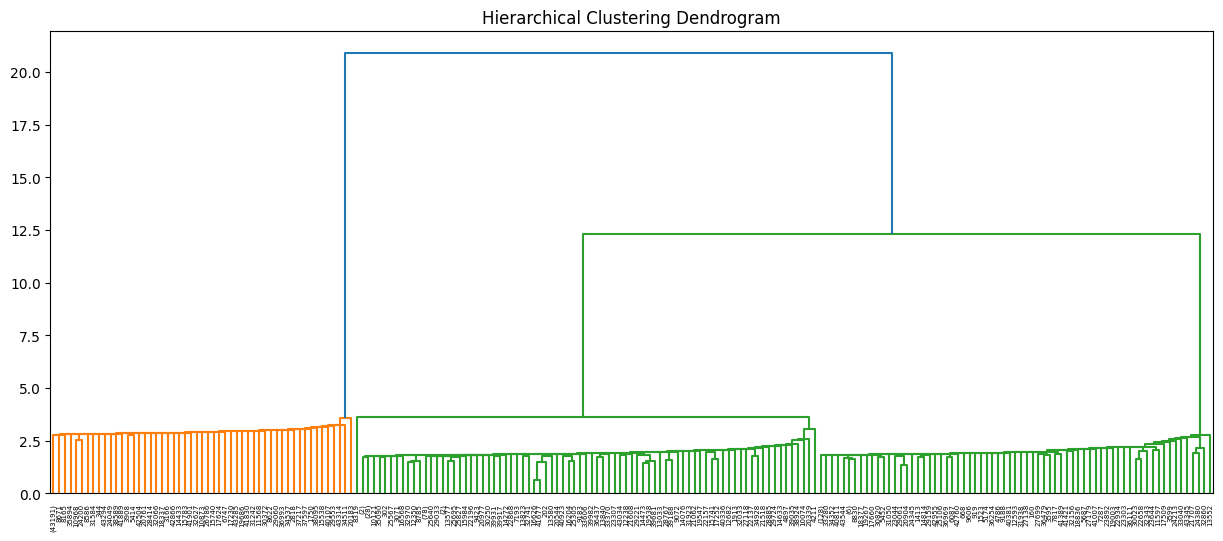

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(single_clust, truncate_mode="level", p=50)
plt.axhline(y = 50, color = 'r', linestyle = '-')
plt.show()

In [ ]:
data_single_clusters1['cluster'] = AgglomerativeClustering(linkage='single', n_clusters=8).fit_predict(data_single1)

In [ ]:
data_single_clusters1.groupby(by='cluster').size()

cluster
0    43239
1      186
2      201
3        1
4        1
5        1
6        1
7        1
dtype: int64

I try to use 8 clusters to compare the solution with the k-means solution. This was not possible, and my final solution fell back on the division into 8 k-means clusters.

###FINAL CLUSTERS

I tested the encoded data and got worse results than expected. The reduction in dimensionality made me lose several important features of the dataset even though it presented such a loss = 0.12

Final solution, the last column indicates the cluster which the observation pertains:

In [13]:
data_kmean_clusters1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


kids_home  teens_home  number_complaints  \
customer_id                                             
39634              1.0         1.0                1.0   
43460              1.0         0.0                1.0   
23937              0.0         1.0                1.0   
2431               0.0         0.0                0.0   
10090              0.0         0.0                0.0   
...                ...         ...                ...   
48487              1.0         1.0                0.0   
24856              1.0         1.0                1.0   
21373              0.0         0.0                0.0   
19527              1.0         0.0                1.0   
5120               2.0         0.0                2.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
39634                            1.0                   18306.0   
43460                            1.0                    5015.0   
23937                            2.0                    3097.0   
2431                             0.0                   10825.0   
10090                            0.0                     697.0   
...                              ...                       ...   
48487                            0.0                    7189.0   
24856                            0.0                   11238.0   
21373                            0.0                    6059.0   
19527                            0.0                    3098.0   
5120                             0.0                    6869.0   

             lifetime_spend_electronics  typical_hour  \
customer_id                                             
39634                            7106.0     17.000000   
43460                            1334.0      8.000000   
23937                            4073.0     10.000000   
2431                              207.0     17.000000   
10090                             570.0     18.311475   
...                                 ...           ...   
48487                            6293.0     17.000000   
24856                           11490.0     12.000000   
21373                             241.0     12.000000   
19527                             425.0      6.000000   
5120                             1554.0     10.000000   

             lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
customer_id                                                                
39634                            484.0                             604.0   
43460                            344.0                             374.0   
23937                            301.0                             852.0   
2431                             153.0                             252.0   
10090                              8.0                              33.0   
...                                ...                               ...   
48487                            678.0                             741.0   
24856                            602.0                             557.0   
21373                            289.0                             420.0   
19527                            866.0                             369.0   
5120                             268.0                             659.0   

             lifetime_spend_alcohol_drinks  ...  lifetime_spend_petfood  \
customer_id                                 ...                           
39634                                943.0  ...                  2514.0   
43460                               1217.0  ...                  1987.0   
23937                               1731.0  ...                  2018.0   
2431                                  60.0  ...                  4135.0   
10090                               2833.0  ...                    64.0   
...                                    ...  ...                     ...   
48487                                639.0  ...                  2812.0   
24856 

In [14]:
solution = data_kmean_clusters1.groupby(by = 'cluster_kmeans').mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
solution.to_csv('solution')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
solution = pd.read_csv('solution')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
size = data_kmean_clusters1.groupby(by='cluster_kmeans').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


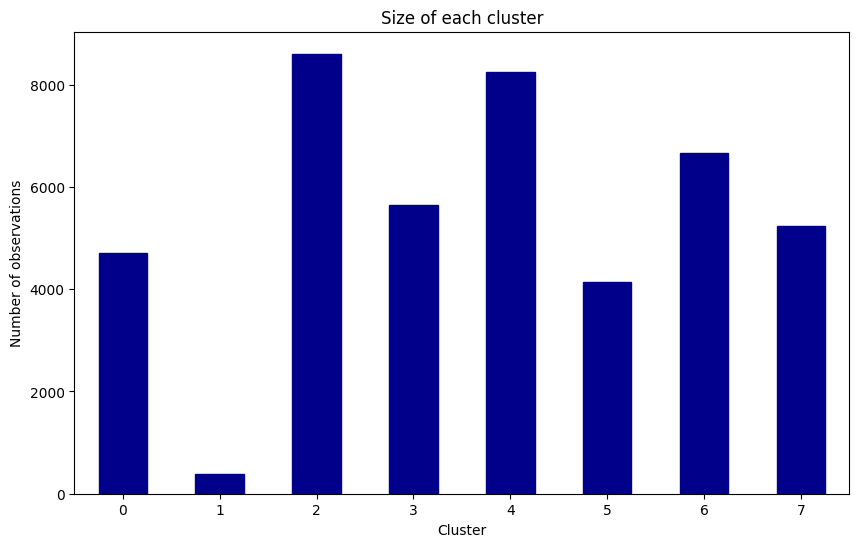

In [16]:
plt.figure(figsize=(10, 6))
size.plot(kind='bar', color='darkblue',edgecolor='darkblue')
plt.title('Size of each cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of observations')
plt.xticks(rotation=0)
plt.show()

In [18]:
datascatter = solution[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks'
,'lifetime_spend_alcohol_drinks','lifetime_spend_meat','lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_petfood']]
avgs_ = []
for column in datascatter.columns:
  avgs_.append(data[column].mean())
print(avgs_)
datascatter.loc['Dataset_avg'] = avgs_
scaler = MinMaxScaler()
datascatter_normalized = pd.DataFrame(scaler.fit_transform(datascatter), columns=datascatter.columns).set_index(datascatter.index)
dataset_avg_scaled = datascatter_normalized.iloc[-1].tolist()
datascatter_normalized = datascatter_normalized.drop(datascatter_normalized.index[-1])


[5600.030047443332, 2000.0584676033095, 457.16486901514975, 443.63665742247485, 494.07336526781415, 709.3679493937797, 1468.5704836123812, 916.9484082418464, 2023.225619399051]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-0023e5bd4633>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datascatter.loc['Dataset_avg'] = avgs_


In [19]:
datascatter_normalized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lifetime_spend_groceries  lifetime_spend_electronics  \
cluster_kmeans                                                         
0                               0.115034                    0.271018   
1                               0.986727                    0.003457   
2                               0.072824                    0.033278   
3                               1.000000                    1.000000   
4                               0.000000                    0.011845   
5                               0.679028                    0.000000   
6                               0.247120                    0.232247   
7                               0.241497                    0.237756   

                lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
cluster_kmeans                                                                
0                                0.080264                          0.327038   
1                                0.274641                          0.000000   
2                                1.000000                          0.050925   
3                                0.399348                          0.990978   
4                                0.032399                          0.033132   
5                                0.000000                          0.655197   
6                                0.395154                          0.674102   
7                                0.139782                          1.000000   

                lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
cluster_kmeans                                                       
0                                    0.872263             0.247061   
1                                    0.061175             0.000000   
2                                    0.129113             0.005600   
3                                    1.000000             1.000000   
4                                    0.302841             0.177912   
5                                    0.000000             0.061451   
6                                    0.270941             0.479063   
7                                    0.990133             0.467868   

                lifetime_spend_fish  lifetime_spend_hygiene  \
cluster_kmeans                                                
0                          0.015741                0.302444   
1                          1.000000                0.011155   
2                          0.000000                0.221664   
3                          0.097474                1.000000   
4                          0.010181                0.222495   
5                          0.002626                0.000000   
6                          0.022753                0.479447   
7                          0.045142                0.967444   

                lifetime_spend_petfood  
cluster_kmeans                          
0                             0.064187  
1                             0.000000  
2                             0.051944  
3                             0.295132  
4                             0.058386  
5                             1.000000  
6                             0.098070  
7                             0.188163

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(y))
/

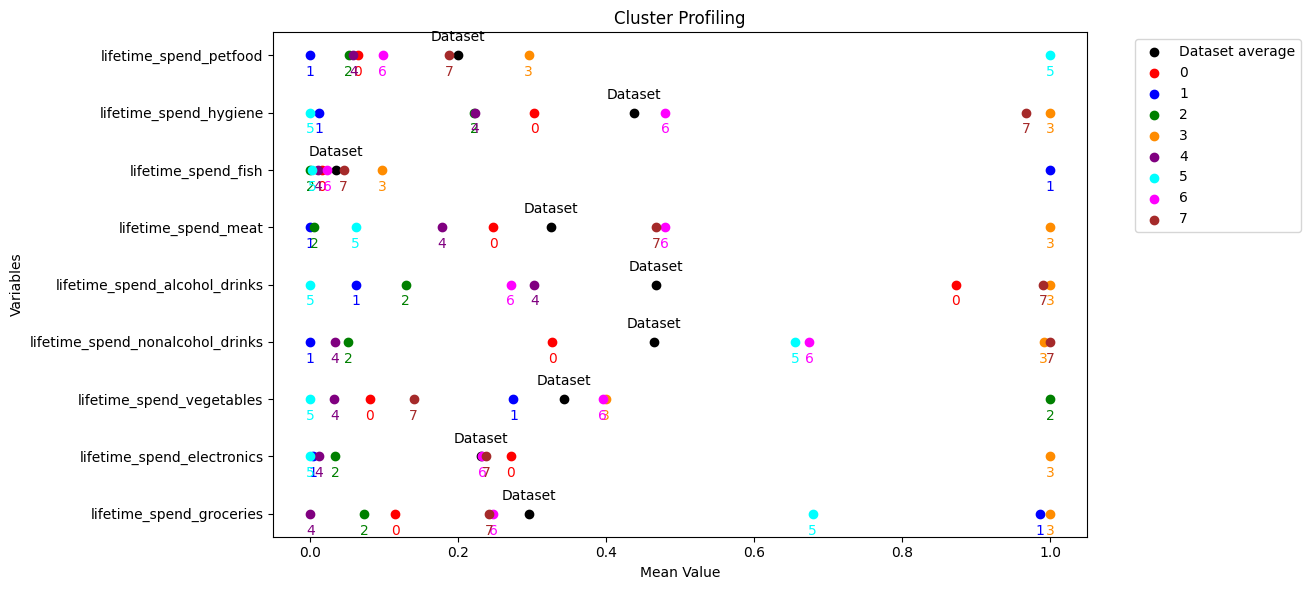

In [21]:
dataset_avg_scaled
variables = ['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks'
,'lifetime_spend_alcohol_drinks','lifetime_spend_meat','lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_petfood']
cluster_averages = {index: row.tolist() for index, row in datascatter_normalized.iterrows()}
colors = ['red', 'blue', 'green', 'darkorange', 'purple', 'cyan', 'magenta', 'brown','yellow']

fig, ax = plt.subplots(figsize=(18, 6))


ax.scatter(dataset_avg_scaled, variables, color='black', label='Dataset average')

for i, (cluster, averages) in enumerate(cluster_averages.items()):
    ax.scatter(averages, variables, color=colors[i], label=cluster)

for i, var in enumerate(variables):
    ax.annotate('Dataset', (float(dataset_avg_scaled[i]), var), textcoords="offset points", xytext=(0, 10), ha='center', color='black')
    for j, (cluster, averages) in enumerate(cluster_averages.items()):
        ax.annotate(cluster, (float(averages[i]), var), textcoords="offset points", xytext=(0, -15), ha='center', color=colors[j])


ax.set_xlabel('Mean Value')
ax.set_ylabel('Variables')
ax.set_title('Cluster Profiling')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()


Let's see how the location of the clusters was distributed

In [27]:
solution[['latitude','longitude']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


latitude  longitude
0  38.745840  -9.151244
1  39.167013  -9.398571
2  38.747645  -9.157131
3  38.752033  -9.146114
4  38.747936  -9.157114
5  38.748683  -9.173797
6  38.749779  -9.155794
7  38.747972  -9.157075

Latitude and longitude of cluster 1 stand out from the rest.

In [34]:
cluster1_lat_lon = data_kmean_clusters1[data_kmean_clusters1['cluster_kmeans'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
mapa = folium.Map(location = [39,-9], zoom_start = 9)
cluster1_lat_lon_map = cluster1_lat_lon[['latitude', 'longitude']].values.tolist()
marker_cluster = FastMarkerCluster(cluster1_lat_lon_map).add_to(mapa)
mapa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This cluster was grouped exactly with the only customers outside Lisbon. Let's compare it with the first map, from the original customer_info dataset:

In [30]:
mapa = folium.Map(location = [39,-9], zoom_start = 9)
data_list = customer_info[['latitude', 'longitude']].values.tolist()
marker_cluster = FastMarkerCluster(data_list).add_to(mapa)
mapa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'customer_info' is not defined

Exactly the customers from the 2 regions.


In [31]:
solution['lifetime_total_distinct_products']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     396.341702
1      19.881443
2     228.677783
3     100.584899
4     403.510656
5      51.747470
6     513.672023
7    1056.435157
Name: lifetime_total_distinct_products, dtype: float64

These are the customers with the smallest variety of products purchased. Possibly because these regions have smaller stores. ( For example, through the scatter plot with the lifetime_spent variables it was also possible to verify that this cluster did not spend a single euro on petfood, which indicates the absence of sales of this type of product. A possible good measure would be to implement pet food in the stores of these regions.)

Last comparison (between each cluster and the mean of each variable):

In [32]:
solution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster_kmeans  kids_home  teens_home  number_complaints  \
0               0   0.324681    0.200000           0.179149   
1               1   0.023196    0.030928           0.502577   
2               2   0.978852    0.466535           0.528585   
3               3   1.001950    0.996455           0.493442   
4               4   0.582344    0.988254           0.968636   
5               5   0.000000    0.011807           0.503373   
6               6   2.857786    2.066677           1.002703   
7               7   0.993688    0.840857           1.026970   

   distinct_stores_visited  lifetime_spend_groceries  \
0                 0.453191               3436.148085   
1                 0.000000              13854.639175   
2                 0.248548               2931.655473   
3                 0.377703              14013.274371   
4                 1.824171               2061.264471   
5                 0.000000              10177.019036   
6                 0.110377               5014.846373   
7                 1.003252               4947.643650   

   lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  \
0                 2316.271489     15.080638                 258.858547   
1                  187.306701     10.001563                 405.477541   
2                  424.590286     13.752226                 952.619485   
3                 8116.734846     13.643470                 499.544787   
4                  254.055704     12.384549                 222.753219   
5                  159.801928     11.859032                 198.314657   
6                 2007.775342     17.628785                 496.381288   
7                 2051.609028      9.752436                 303.752880   

   lifetime_spend_nonalcohol_drinks  ...  lifetime_spend_videogames  \
0                        403.590426  ...                 712.512128   
1                        308.463918  ...                   0.000000   
2                        323.276551  ...                 244.353474   
3                        596.712513  ...                4004.601737   
4                        318.100993  ...                 410.756115   
5                        499.042892  ...                   0.000000   
6                        504.541823  ...                 996.914402   
7                        599.336649  ...                 981.857307   

   lifetime_spend_petfood  lifetime_total_distinct_products  \
0              652.574894                        396.341702   
1                0.000000                         19.881443   
2              528.098536                        228.677783   
3             3000.533322                        100.584899   
4              593.592759                        403.510656   
5            10166.746988                         51.747470   
6              997.051209                        513.672023   
7             1913.002487                       1056.435157   

   percentage_of_products_bought_promotion   latitude  longitude        Age  \
0                                 0.162475  38.745840  -9.151244  31.765745   
1                                 0.397338  39.167013  -9.398571  53.747423   
2                                 0.191527  38.747645  -9.157131  54.792122   
3                                 0.049517  38.752033  -9.146114  54.591634   
4                                 0.480808  38.747936  -9.157114  55.305038   
5                                 0.197913  38.748683  -9.173797  54.751084   
6                                 0.198529  38.749779  -9.155794  54.832557   
7                                 0.201029  38.747972  -9.157075  55.206006   

   loyalty_card  years_since_first_purchase      male  
0      0.490638                    7.054468  0.496383  
1      0.798969                   12.737113  0.510309  
2      0.485243                   12.996514  0.494655  
3      0.500000                   12.859801  0.497696  
4      0.744611                   13.138896  0.504117  
5      

In [33]:
data.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


kids_home                                     1.023263
teens_home                                    0.847035
number_complaints                             0.699136
distinct_stores_visited                       0.629002
lifetime_spend_groceries                   5600.030047
lifetime_spend_electronics                 2000.058468
typical_hour                                 13.521353
lifetime_spend_vegetables                   457.164869
lifetime_spend_nonalcohol_drinks            443.636657
lifetime_spend_alcohol_drinks               494.073365
lifetime_spend_meat                         709.367949
lifetime_spend_fish                        1468.570484
lifetime_spend_hygiene                      916.948408
lifetime_spend_videogames                   990.334922
lifetime_spend_petfood                     2023.225619
lifetime_total_distinct_products            387.260182
percentage_of_products_bought_promotion       0.229431
latitude                                     38.752266
longitude 

Summary of the identified customers segments:

**Clusters:**

**Cluster0**:Low number of kids and teens. Low average age (young).Higher spending on electronics. **young** **people**

**Cluster1**: Higher spending on fish and groceries. Located in Peniche and Ericeira. Low number of kids and teens. Little variety of products purchased (possibly due to the stores being smaller). **Ericeira and Peniche customers**

**Cluster2**: maiores gastos em vegetables.They present values ​​similar to the date average in the other variables. **Median customers**

**Cluster 3**: Higher spending relative to other groups and not interested in promotions. **Big spenders**

**Cluster4**:low spenders(spend less than other groups in all categories), more distinct stores visited and take advantage of promotions. **Advantage-takers**

**Cluster5**:They spend large amounts of money on pet food and grocers. No children. More complaints. No loyalty card. Little variety of products purchased. **Pet owners**

**Cluster6**:Spending relatively close to average in all categories. High number of children. More complaints. Typical hour 17. **Family parents**

**Cluster7**:higher spending on hygiene and in the 2 drinks categories. Distinct stores visited high. Typical hour 9. Greater number of different products purchased. **Early risers**

###Customer basket

In [14]:
customer_basket = pd.read_csv('customer_basket.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
customer_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


invoice_id                                      list_of_goods  customer_id
0     7448187  ['olive oil', 'yogurt cake', 'grated cheese', ...        43134
1     3167314  ['babies food', 'shower gel', 'rice', 'black b...        43134
2    10199712  ['babies food', 'barbecue sauce', 'olive oil',...        43134
3    12179179  ['babies food', 'milk', 'rice', 'yogurt cake',...        43134
4     8292388  ['napkins', 'cookies', 'razor', 'cooking oil',...        43134

In [114]:
customer_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89952 entries, 0 to 89951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   invoice_id     89952 non-null  int64 
 1   list_of_goods  89952 non-null  object
 2   customer_id    89952 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [115]:
customer_basket.groupby('invoice_id').size().sort_values()

invoice_id
20066       1
8139941     1
8139648     1
8139387     1
8139335     1
           ..
646687      2
9455181     2
3688852     2
11909423    2
4508313     2
Length: 89651, dtype: int64

repeated baskets, not good because the transaction number should be unique

In [116]:
customer_basket[customer_basket['invoice_id'] == 4508313]

invoice_id                                      list_of_goods  \
60175     4508313  ['green beans', 'bacon', 'black tea', 'tomatoe...   
65701     4508313  ['green beans', 'bacon', 'black tea', 'tomatoe...   

       customer_id  
60175         1517  
65701        24267

I don't know which customer made each purchase. It would be a mistake to remove one of the two rows. I could remove both, but I would be putting the possibility of losing important information. I'm going to keep both.


In [16]:
map = pd.DataFrame(data_kmean_clusters1['cluster_kmeans'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
map


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster_kmeans
customer_id                
39634                     3
43460                     7
23937                     7
2431                      5
10090                     0
...                     ...
48487                     3
24856                     3
21373                     5
19527                     2
5120                      7

[43631 rows x 1 columns]

In [18]:
customer_basket


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


invoice_id                                      list_of_goods  \
0         7448187  ['olive oil', 'yogurt cake', 'grated cheese', ...   
1         3167314  ['babies food', 'shower gel', 'rice', 'black b...   
2        10199712  ['babies food', 'barbecue sauce', 'olive oil',...   
3        12179179  ['babies food', 'milk', 'rice', 'yogurt cake',...   
4         8292388  ['napkins', 'cookies', 'razor', 'cooking oil',...   
...           ...                                                ...   
89947    10920856  ['rice', 'pet food', 'cauliflower', 'cake', 'c...   
89948    10239983  ['cotton buds', 'cream', 'gums', 'cooking oil'...   
89949    10238942  ['cottage cheese', 'champagne', 'spaghetti', '...   
89950     6593522  ['chutney', 'samsung galaxy 10', 'catfish', 't...   
89951     8150061  ['cotton buds', 'phone car charger', 'cooking ...   

       customer_id  
0            43134  
1            43134  
2            43134  
3            43134  
4            43134  
...            ...  
89947        31335  
89948        35452  
89949         3608  
89950        33063  
89951        30047  

[89952 rows x 3 columns]

In [19]:
invoices_clusters = customer_basket.merge(map, on='customer_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
invoices_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89952 entries, 0 to 89951
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   invoice_id      89952 non-null  int64 
 1   list_of_goods   89952 non-null  object
 2   customer_id     89952 non-null  int64 
 3   cluster_kmeans  89952 non-null  int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 2.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
invoices_clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


invoice_id                                      list_of_goods  \
0         7448187  ['olive oil', 'yogurt cake', 'grated cheese', ...   
1         3167314  ['babies food', 'shower gel', 'rice', 'black b...   
2        10199712  ['babies food', 'barbecue sauce', 'olive oil',...   
3        12179179  ['babies food', 'milk', 'rice', 'yogurt cake',...   
4         8292388  ['napkins', 'cookies', 'razor', 'cooking oil',...   
...           ...                                                ...   
89947    10920856  ['rice', 'pet food', 'cauliflower', 'cake', 'c...   
89948    10239983  ['cotton buds', 'cream', 'gums', 'cooking oil'...   
89949    10238942  ['cottage cheese', 'champagne', 'spaghetti', '...   
89950     6593522  ['chutney', 'samsung galaxy 10', 'catfish', 't...   
89951     8150061  ['cotton buds', 'phone car charger', 'cooking ...   

       customer_id  cluster_kmeans  
0            43134               4  
1            43134               4  
2            43134               4  
3            43134               4  
4            43134               4  
...            ...             ...  
89947        31335               4  
89948        35452               6  
89949         3608               3  
89950        33063               3  
89951        30047               4  

[89952 rows x 4 columns]

In [22]:
cluster0 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 0].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster1 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 1].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster2 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 2].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster3 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 3].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster4 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 4].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster5 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 5].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster6 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 6].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])
cluster7 = invoices_clusters[invoices_clusters['cluster_kmeans'] == 7].drop(columns = ['cluster_kmeans','customer_id','invoice_id'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
cluster0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list_of_goods
34     ['low fat yogurt', 'babies food', 'pancakes', ...
35     ['gums', 'fresh bread', 'ketchup', 'cooking oi...
36     ['milk', 'napkins', 'chili', 'cooking oil', 'c...
37                        ['cake', 'muffins', 'napkins']
38     ['shower gel', 'zucchini', 'napkins', 'yogurt ...
...                                                  ...
89875  ['french fries', 'gluten free bar', 'fresh bre...
89889  ['babies food', 'tooth brush', 'napkins', 'cot...
89891  ['white wine', 'bluetooth headphones', 'iMac',...
89905  ['barbecue sauce', 'ham', 'toilet paper', 'oli...
89936               ['google tablet', 'oil', 'red wine']

[10383 rows x 1 columns]

Cluster0

In [24]:
cluster0['list_of_goods'] = cluster0['list_of_goods'].apply(ast.literal_eval)
basket0_list = cluster0['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket0_list).transform(basket0_list)
basket0 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
frequent_itemsets_cluster0 = apriori(
    basket0, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster0.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                        itemsets
18  0.453722                           (oil)
8   0.370606                   (cooking oil)
24  0.331214                    (white wine)
3   0.288934                          (cake)
39  0.261581              (oil, cooking oil)
4   0.240297                    (candy bars)
7   0.231821                         (cider)
13  0.208514                          (gums)
30  0.202157                     (oil, cake)
16  0.186362                       (muffins)
9   0.175672                  (dessert wine)
35  0.170953             (cider, white wine)
17  0.169412                       (napkins)
32  0.163922               (oil, candy bars)
28  0.159684             (cake, cooking oil)
1   0.151594                          (beer)
23  0.146682                          (soup)
42  0.139651                     (oil, gums)
12  0.133584                   (fresh bread)
40  0.130020      (dessert wine, white wine)
31  0.128864       (cooking oil, candy bars)
0   0.128672                   (babies food)
46  0.126842        (oil, cake, cooking oil)
6   0.126264                     (champagne)
43  0.121930                  (muffins, oil)
10  0.121545                  (french fries)
14  0.117307                       (ketchup)
44  0.112106                  (oil, napkins)
26  0.110276              (white wine, beer)
36  0.108543             (gums, cooking oil)
19  0.106231                     (olive oil)
2   0.106039                       (bramble)
25  0.104787                   (yogurt cake)
47  0.103246  (oil, cooking oil, candy bars)
27  0.096504              (cake, candy bars)
37  0.096215          (muffins, cooking oil)
11  0.095733                   (french wine)
45  0.095252                     (oil, soup)
21  0.092748                      (red wine)
34  0.091881           (cider, dessert wine)
20  0.090918                      (pet food)
38  0.090629          (cooking oil, napkins)
15  0.088414                          (milk)
33  0.087932         (champagne, white wine)
5   0.087354                       (cereals)
48  0.086969        (oil, gums, cooking oil)
29  0.084272                    (cake, gums)
41  0.080998              (oil, fresh bread)
22  0.080998                          (rice)

In [31]:
assrules_0 = association_rules(frequent_itemsets_cluster0, metric="confidence", min_threshold=0.7)
assrules_0[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents   consequents   support  confidence      lift
0                     (beer)  (white wine)  0.110276    0.727446  2.196299
1                    (cider)  (white wine)  0.170953    0.737432  2.226450
2              (cooking oil)         (oil)  0.261581    0.705821  1.555623
3             (dessert wine)  (white wine)  0.130020    0.740132  2.234599
4        (cake, cooking oil)         (oil)  0.126842    0.794331  1.750697
5  (cooking oil, candy bars)         (oil)  0.103246    0.801196  1.765828
6        (gums, cooking oil)         (oil)  0.086969    0.801242  1.765930

Promotions: Buy cooking oil and you have 20% discount on oil

If you buy gums, you have 10 % discount on cooking oil

Buy 2 oils and get 1 one free

Cluster 1

In [31]:
cluster1['list_of_goods'] = cluster1['list_of_goods'].apply(ast.literal_eval)
basket1_list = cluster1['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket1_list).transform(basket1_list)
basket1 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
frequent_itemsets_cluster1 = apriori(
    basket1, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster1.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                        itemsets
18  0.453722                           (oil)
8   0.370606                   (cooking oil)
24  0.331214                    (white wine)
3   0.288934                          (cake)
39  0.261581              (oil, cooking oil)
4   0.240297                    (candy bars)
7   0.231821                         (cider)
13  0.208514                          (gums)
30  0.202157                     (oil, cake)
16  0.186362                       (muffins)
9   0.175672                  (dessert wine)
35  0.170953             (cider, white wine)
17  0.169412                       (napkins)
32  0.163922               (oil, candy bars)
28  0.159684             (cake, cooking oil)
1   0.151594                          (beer)
23  0.146682                          (soup)
42  0.139651                     (oil, gums)
12  0.133584                   (fresh bread)
40  0.130020      (dessert wine, white wine)
31  0.128864       (cooking oil, candy bars)
0   0.128672                   (babies food)
46  0.126842        (oil, cake, cooking oil)
6   0.126264                     (champagne)
43  0.121930                  (muffins, oil)
10  0.121545                  (french fries)
14  0.117307                       (ketchup)
44  0.112106                  (oil, napkins)
26  0.110276              (white wine, beer)
36  0.108543             (gums, cooking oil)
19  0.106231                     (olive oil)
2   0.106039                       (bramble)
25  0.104787                   (yogurt cake)
47  0.103246  (oil, cooking oil, candy bars)
27  0.096504              (cake, candy bars)
37  0.096215          (muffins, cooking oil)
11  0.095733                   (french wine)
45  0.095252                     (oil, soup)
21  0.092748                      (red wine)
34  0.091881           (cider, dessert wine)
20  0.090918                      (pet food)
38  0.090629          (cooking oil, napkins)
15  0.088414                          (milk)
33  0.087932         (champagne, white wine)
5   0.087354                       (cereals)
48  0.086969        (oil, gums, cooking oil)
29  0.084272                    (cake, gums)
41  0.080998              (oil, fresh bread)
22  0.080998                          (rice)

In [37]:
assrules_1 = association_rules(frequent_itemsets_cluster1, metric="confidence", min_threshold=0.7)
assrules_1[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents   consequents   support  confidence      lift
6        (gums, cooking oil)         (oil)  0.086969    0.801242  1.765930
5  (cooking oil, candy bars)         (oil)  0.103246    0.801196  1.765828
4        (cake, cooking oil)         (oil)  0.126842    0.794331  1.750697
3             (dessert wine)  (white wine)  0.130020    0.740132  2.234599
1                    (cider)  (white wine)  0.170953    0.737432  2.226450
0                     (beer)  (white wine)  0.110276    0.727446  2.196299
2              (cooking oil)         (oil)  0.261581    0.705821  1.555623

Promotions: 10% discount on this products:cider, beer and withe wine

Buy 2 oils and get 1 one free

Cluster 2

In [38]:
cluster2['list_of_goods'] = cluster2['list_of_goods'].apply(ast.literal_eval)
basket2_list = cluster2['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket2_list).transform(basket2_list)
basket2 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
frequent_itemsets_cluster2 = apriori(
    basket2, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster2.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                itemsets
18  0.656925              (tomatoes)
0   0.565217             (asparagus)
2   0.471875               (carrots)
31  0.455781   (asparagus, tomatoes)
39  0.382977     (carrots, tomatoes)
..       ...                     ...
12  0.082256         (herb & pepper)
30  0.082256    (asparagus, shallot)
7   0.081388          (dessert wine)
11  0.080468          (green grapes)
25  0.080161  (asparagus, flax seed)

[64 rows x 2 columns]

In [40]:
assrules_2 = association_rules(frequent_itemsets_cluster2, metric="confidence", min_threshold=0.7)
assrules_2[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  consequents   support  confidence  \
37  (asparagus, carrots, mashed potato)   (tomatoes)  0.110612    0.865654   
27             (asparagus, green beans)   (tomatoes)  0.094876    0.856945   
33               (cauliflower, carrots)   (tomatoes)  0.083891    0.854763   
35             (carrots, mashed potato)   (tomatoes)  0.149032    0.852176   
29           (asparagus, mashed potato)   (tomatoes)  0.175497    0.849407   
36                    (carrots, melons)   (tomatoes)  0.104889    0.848347   
31                  (asparagus, melons)   (tomatoes)  0.126450    0.846733   
21                 (asparagus, carrots)   (tomatoes)  0.277270    0.844406   
34         (frozen vegetables, carrots)   (tomatoes)  0.095233    0.844203   
26       (frozen vegetables, asparagus)   (tomatoes)  0.113626    0.844023   
24             (cauliflower, asparagus)   (tomatoes)  0.099678    0.843493   
12                      (mashed potato)   (tomatoes)  0.239565    0.816330   
11                        (green beans)   (tomatoes)  0.127369    0.815239   
7                             (carrots)   (tomatoes)  0.382977    0.811607   
8                         (cauliflower)   (tomatoes)  0.137741    0.810827   
13                             (melons)   (tomatoes)  0.170030    0.810127   
9                           (flax seed)   (tomatoes)  0.091095    0.809351   
10                  (frozen vegetables)   (tomatoes)  0.153170    0.808304   
14                            (shallot)   (tomatoes)  0.094927    0.807475   
5                           (asparagus)   (tomatoes)  0.455781    0.806382   
16                         (toothpaste)   (tomatoes)  0.085577    0.804515   
17                           (zucchini)   (tomatoes)  0.110101    0.804104   
6                             (avocado)   (tomatoes)  0.106831    0.799618   
15                         (shower gel)   (tomatoes)  0.083125    0.799509   
28              (tomatoes, green beans)  (asparagus)  0.094876    0.744886   
32                   (tomatoes, melons)  (asparagus)  0.126450    0.743690   
38   (tomatoes, carrots, mashed potato)  (asparagus)  0.110612    0.742201   
18         (frozen vegetables, carrots)  (asparagus)  0.083687    0.741848   
25        (frozen vegetables, tomatoes)  (asparagus)  0.113626    0.741828   
20                    (carrots, melons)  (asparagus)  0.091504    0.740083   
30            (tomatoes, mashed potato)  (asparagus)  0.175497    0.732566   
19             (carrots, mashed potato)  (asparagus)  0.127778    0.730646   
22                  (carrots, tomatoes)  (asparagus)  0.277270    0.723986   
23              (cauliflower, tomatoes)  (asparagus)  0.099678    0.723665   
0                           (flax seed)  (asparagus)  0.080161    0.712211   
4                              (melons)  (asparagus)  0.149338    0.711538   
1                   (frozen vegetables)  (asparagus)  0.134624    0.710434   
2                         (green beans)  (asparagus)  0.110714    0.708633   
3                       (mashed potato)  (asparagus)  0.206611    0.704039   

        lift  
37  1.317735  
27  1.304479  
33  1.301157  
35  1.297220  
29  1.293003  
36  1.291390  
31  1.288933  
21  1.285392  
34  1.285082  
26  1.284808  
24  1.284002  
12  1.242653  
11  1.240991  
7   1.235463  
8   1.234276  
13  1.233209  
9   1.232029  
10  1.230435  
14  1.229173  
5   1.227509  
16  1.224667  
17  1.224042  
6   1.217212  
15  1.217046  
28  1.317875  
32  1.315759  
38  1.313125  
18  1.312500  
25  1.312465  
20  1.309377  
30  1.296078  
19  1.292681  
22  1.280899  
23  1.280330  
0   1.260065  
4   1.258876  
1   1.256922  
2   1.253735  
3   1.245607

10% on vegetables and groceries for purchases over €50, 20% for purchases over €100

Cluster 3

In [41]:
cluster3['list_of_goods'] = cluster3['list_of_goods'].apply(ast.literal_eval)
basket3_list = cluster3['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket3_list).transform(basket3_list)
basket3 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
frequent_itemsets_cluster3 = apriori(
    basket3, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster3.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets
4   0.737687                                        (champagne)
22  0.506948                                (samsung galaxy 10)
60  0.395553                     (champagne, samsung galaxy 10)
3   0.388683                             (bluetooth headphones)
0   0.348155                                          (airpods)
..       ...                                                ...
83  0.082368  (cottage cheese, bluetooth headphones, champagne)
23  0.082137                                          (shallot)
73  0.080670                                (spaghetti, laptop)
8   0.080516                                        (flax seed)
80  0.080284                       (laptop, airpods, champagne)

[94 rows x 2 columns]

In [43]:
assrules_3 = association_rules(frequent_itemsets_cluster3, metric="confidence", min_threshold=0.7)
assrules_3[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  consequents   support  \
34              (iphone 8, samsung galaxy 10)  (champagne)  0.099352   
27             (bluetooth headphones, laptop)  (champagne)  0.089393   
23                          (airpods, laptop)  (champagne)  0.080284   
35                (laptop, samsung galaxy 10)  (champagne)  0.117493   
31         (fromage blanc, samsung galaxy 10)  (champagne)  0.093716   
28  (bluetooth headphones, samsung galaxy 10)  (champagne)  0.171762   
29          (spaghetti, bluetooth headphones)  (champagne)  0.103829   
24               (airpods, samsung galaxy 10)  (champagne)  0.155473   
25                       (spaghetti, airpods)  (champagne)  0.091786   
36             (spaghetti, samsung galaxy 10)  (champagne)  0.136483   
22            (airpods, bluetooth headphones)  (champagne)  0.120349   
33                  (iMac, samsung galaxy 10)  (champagne)  0.083218   
30        (cottage cheese, samsung galaxy 10)  (champagne)  0.109927   
15                              (protein bar)  (champagne)  0.086460   
26     (cottage cheese, bluetooth headphones)  (champagne)  0.082368   
32         (grated cheese, samsung galaxy 10)  (champagne)  0.082986   
11                                 (iphone 8)  (champagne)  0.177088   
12                                   (laptop)  (champagne)  0.203721   
5                             (fromage blanc)  (champagne)  0.170218   
21                                   (turkey)  (champagne)  0.100355   
2                      (bluetooth headphones)  (champagne)  0.304925   
9                               (ground beef)  (champagne)  0.091400   
7                             (google tablet)  (champagne)  0.086923   
6                           (gluten free bar)  (champagne)  0.088853   
19                                (spaghetti)  (champagne)  0.236992   
16                        (samsung galaxy 10)  (champagne)  0.395553   
0                                   (airpods)  (champagne)  0.271345   
18                                   (shrimp)  (champagne)  0.107843   
14                        (phone car charger)  (champagne)  0.130076   
10                                     (iMac)  (champagne)  0.147908   
3                            (cottage cheese)  (champagne)  0.195770   
1                                 (asparagus)  (champagne)  0.140883   
4                                  (escalope)  (champagne)  0.109078   
13                          (parmesan cheese)  (champagne)  0.133781   
8                             (grated cheese)  (champagne)  0.146673   
17                               (shower gel)  (champagne)  0.120272   
20                          (sparkling water)  (champagne)  0.082600   

    confidence      lift  
34    0.827121  1.121235  
27    0.824786  1.118071  
23    0.822134  1.114476  
35    0.820928  1.112840  
31    0.820270  1.111949  
28    0.817414  1.108076  
29    0.816636  1.107022  
24    0.814395  1.103985  
25    0.813269  1.102458  
36    0.812874  1.101922  
22    0.812402  1.101283  
33    0.808096  1.095445  
30    0.807714  1.094928  
15    0.801144  1.086022  
26    0.793899  1.076200  
32    0.789860  1.070725  
11    0.788587  1.068999  
12    0.787996  1.068199  
5     0.784698  1.063727  
21    0.784550  1.063527  
2     0.784508  1.063470  
9     0.781518  1.059417  
7     0.781402  1.059259  
6     0.780868  1.058536  
19    0.780376  1.057869  
16    0.780265  1.057718  
0     0.779379  1.056517  
18    0.776543  1.052672  
14    0.776140  1.052126  
10    0.775395  1.051116  
3     0.774115  1.049381  
1     0.773305  1.048283  
4     0.772131  1.046692  
13    0.771594  1.045964  
8     0.769542  1.043182  
17    0.762231  1.033271  
20    0.756719  1.025799

Champagne offer with purchases over €200

Cluster 4

In [44]:
cluster4['list_of_goods'] = cluster4['list_of_goods'].apply(ast.literal_eval)
basket4_list = cluster4['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket4_list).transform(basket4_list)
basket4 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
frequent_itemsets_cluster4 = apriori(
    basket4, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster4.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                              itemsets
15  0.693866                                 (oil)
6   0.504837                         (cooking oil)
42  0.410111                    (oil, cooking oil)
1   0.395917                                (cake)
30  0.319796                           (oil, cake)
..       ...                                   ...
67  0.082979  (oil, cake, cooking oil, candy bars)
5   0.082341                             (cookies)
7   0.081756                               (cream)
26  0.081278                   (fresh bread, cake)
56  0.080162             (cake, gums, cooking oil)

[68 rows x 2 columns]

In [46]:
assrules_4 = association_rules(frequent_itemsets_cluster4, metric="confidence", min_threshold=0.7)
assrules_4[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents   support  confidence  \
25  (cake, cooking oil, candy bars)       (oil)  0.082979    0.878941   
19               (gums, candy bars)       (oil)  0.087072    0.865293   
20       (fresh bread, cooking oil)       (oil)  0.090474    0.861336   
21              (gums, cooking oil)       (oil)  0.140123    0.860033   
16                     (cake, gums)       (oil)  0.107431    0.859269   
18        (cooking oil, candy bars)       (oil)  0.164469    0.858252   
23           (cooking oil, napkins)       (oil)  0.102807    0.857270   
14               (cake, candy bars)       (oil)  0.127631    0.855666   
15              (cake, cooking oil)       (oil)  0.201892    0.854059   
22           (muffins, cooking oil)       (oil)  0.118010    0.853190   
24              (soup, cooking oil)       (oil)  0.089783    0.843656   
17                  (muffins, cake)       (oil)  0.091963    0.841849   
2                      (candy bars)       (oil)  0.259090    0.816963   
6                            (gums)       (oil)  0.219275    0.815862   
3                     (cooking oil)       (oil)  0.410111    0.812362   
9                         (napkins)       (oil)  0.164097    0.809599   
1                            (cake)       (oil)  0.319796    0.807734   
5                     (fresh bread)       (oil)  0.140017    0.805012   
12                           (soup)       (oil)  0.144589    0.803783   
10                      (olive oil)       (oil)  0.105305    0.803651   
4                    (french fries)       (oil)  0.119126    0.801789   
8                         (muffins)       (oil)  0.184404    0.800231   
11                       (pet food)       (oil)  0.085371    0.795443   
13                    (yogurt cake)       (oil)  0.098076    0.794232   
7                         (ketchup)       (oil)  0.111418    0.793639   
0                     (babies food)       (oil)  0.087816    0.782568   

        lift  
25  1.266732  
19  1.247062  
20  1.241359  
21  1.239480  
16  1.238379  
18  1.236914  
23  1.235498  
14  1.233188  
15  1.230871  
22  1.229618  
24  1.215879  
17  1.213274  
2   1.177408  
6   1.175822  
3   1.170777  
9   1.166795  
1   1.164107  
5   1.160185  
12  1.158412  
10  1.158223  
4   1.155539  
8   1.153293  
11  1.146394  
13  1.144648  
7   1.143793  
0   1.127837

By buying 2+ units of cake, cooking oil and candy bars you get a 30% discount in Oil

Cluster 5

In [48]:
cluster5['list_of_goods'] = cluster5['list_of_goods'].apply(ast.literal_eval)
basket5_list = cluster5['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket5_list).transform(basket5_list)
basket5 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
frequent_itemsets_cluster5 = apriori(
    basket5, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster5.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [support, itemsets]
Index: []

In [52]:
cluster5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [list_of_goods]
Index: []

There are no purchases for this cluster.
10% discount in any of the categories other than petfood and groceries

Cluster 6

In [53]:
cluster6['list_of_goods'] = cluster6['list_of_goods'].apply(ast.literal_eval)
basket6_list = cluster6['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket6_list).transform(basket6_list)
basket6 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
frequent_itemsets_cluster6 = apriori(
    basket6, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster6.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                itemsets
0   0.784888                           (babies food)
5   0.572960                           (cooking oil)
26  0.469790              (babies food, cooking oil)
1   0.435681                                  (cake)
2   0.361876                            (candy bars)
..       ...                                     ...
21  0.080821                      (whole wheat rice)
82  0.080756  (cake, babies food, gums, cooking oil)
67  0.080691               (cake, babies food, soup)
60  0.080561              (cooking oil, yogurt cake)
39  0.080366                (babies food, spaghetti)

[83 rows x 2 columns]

In [57]:
assrules_6 = association_rules(frequent_itemsets_cluster6, metric="confidence", min_threshold=0.7)
assrules_6[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents    consequents   support  confidence  \
35        (cake, cooking oil, gums)  (babies food)  0.080756    0.869839   
27      (french fries, cooking oil)  (babies food)  0.086928    0.866019   
23                     (soup, cake)  (babies food)  0.080691    0.865505   
33              (soup, cooking oil)  (babies food)  0.105834    0.863275   
34  (cake, cooking oil, candy bars)  (babies food)  0.093620    0.862358   
30           (ketchup, cooking oil)  (babies food)  0.081536    0.860178   
21                  (muffins, cake)  (babies food)  0.106029    0.858496   
26            (muffins, candy bars)  (babies food)  0.092061    0.856711   
28       (fresh bread, cooking oil)  (babies food)  0.095959    0.855736   
22                  (cake, napkins)  (babies food)  0.090891    0.854612   
29              (gums, cooking oil)  (babies food)  0.162227    0.854552   
20                     (cake, gums)  (babies food)  0.121557    0.853948   
32           (cooking oil, napkins)  (babies food)  0.122336    0.852808   
24        (cooking oil, candy bars)  (babies food)  0.187175    0.852619   
18               (cake, candy bars)  (babies food)  0.145985    0.852428   
25               (gums, candy bars)  (babies food)  0.099337    0.851811   
31           (muffins, cooking oil)  (babies food)  0.139553    0.846669   
19              (cake, cooking oil)  (babies food)  0.226611    0.844961   
16                      (spaghetti)  (babies food)  0.080366    0.844369   
4                    (french fries)  (babies food)  0.139098    0.836655   
15                           (soup)  (babies food)  0.168594    0.836557   
7                         (ketchup)  (babies food)  0.128833    0.835299   
14                           (rice)  (babies food)  0.087968    0.834258   
17                    (yogurt cake)  (babies food)  0.108238    0.833000   
13                       (pet food)  (babies food)  0.098493    0.832510   
9                         (muffins)  (babies food)  0.217710    0.830483   
10                        (napkins)  (babies food)  0.189124    0.829345   
6                            (gums)  (babies food)  0.250130    0.829205   
1                      (candy bars)  (babies food)  0.299116    0.826571   
0                            (cake)  (babies food)  0.359992    0.826275   
5                     (fresh bread)  (babies food)  0.149818    0.823866   
2                         (cereals)  (babies food)  0.085954    0.820211   
3                     (cooking oil)  (babies food)  0.469790    0.819934   
12                      (olive oil)  (babies food)  0.115125    0.818476   
8                            (milk)  (babies food)  0.090696    0.818288   
11                            (oil)  (babies food)  0.098233    0.800847   

        lift  
35  1.108233  
27  1.103367  
23  1.102711  
33  1.099870  
34  1.098701  
30  1.095924  
21  1.093781  
26  1.091507  
28  1.090265  
22  1.088833  
29  1.088756  
20  1.087987  
32  1.086534  
24  1.086294  
18  1.086050  
25  1.085264  
31  1.078713  
19  1.076537  
16  1.075782  
4   1.065954  
15  1.065830  
7   1.064227  
14  1.062900  
17  1.061298  
13  1.060673  
9   1.058091  
10  1.056641  
6   1.056463  
1   1.053106  
0   1.052729  
5   1.049660  
2   1.045003  
3   1.044651  
12  1.042793  
8   1.042554  
11  1.020333

10% discount in the whole basket


Cluster 7

In [58]:
cluster7['list_of_goods'] = cluster7['list_of_goods'].apply(ast.literal_eval)
basket7_list = cluster7['list_of_goods'].tolist()
te = TransactionEncoder()
te_fit = te.fit(basket7_list).transform(basket7_list)
basket7 = pd.DataFrame(te_fit, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
frequent_itemsets_cluster7 = apriori(
    basket7, min_support=0.08, use_colnames=True
    )
frequent_itemsets_cluster7.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                     itemsets
15  0.768463                        (oil)
5   0.558471                (cooking oil)
44  0.456534           (oil, cooking oil)
1   0.433481                       (cake)
30  0.357867                  (oil, cake)
..       ...                          ...
4   0.084165                    (cookies)
22  0.084081   (babies food, cooking oil)
71  0.084081  (ketchup, cooking oil, oil)
14  0.083243                    (oatmeal)
26  0.083075          (fresh bread, cake)

[76 rows x 2 columns]

In [60]:
assrules_7 = association_rules(frequent_itemsets_cluster6, metric="confidence", min_threshold=0.7)
assrules_7[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents    consequents   support  confidence  \
35        (cake, cooking oil, gums)  (babies food)  0.080756    0.869839   
27      (french fries, cooking oil)  (babies food)  0.086928    0.866019   
23                     (soup, cake)  (babies food)  0.080691    0.865505   
33              (soup, cooking oil)  (babies food)  0.105834    0.863275   
34  (cake, cooking oil, candy bars)  (babies food)  0.093620    0.862358   
30           (ketchup, cooking oil)  (babies food)  0.081536    0.860178   
21                  (muffins, cake)  (babies food)  0.106029    0.858496   
26            (muffins, candy bars)  (babies food)  0.092061    0.856711   
28       (fresh bread, cooking oil)  (babies food)  0.095959    0.855736   
22                  (cake, napkins)  (babies food)  0.090891    0.854612   
29              (gums, cooking oil)  (babies food)  0.162227    0.854552   
20                     (cake, gums)  (babies food)  0.121557    0.853948   
32           (cooking oil, napkins)  (babies food)  0.122336    0.852808   
24        (cooking oil, candy bars)  (babies food)  0.187175    0.852619   
18               (cake, candy bars)  (babies food)  0.145985    0.852428   
25               (gums, candy bars)  (babies food)  0.099337    0.851811   
31           (muffins, cooking oil)  (babies food)  0.139553    0.846669   
19              (cake, cooking oil)  (babies food)  0.226611    0.844961   
16                      (spaghetti)  (babies food)  0.080366    0.844369   
4                    (french fries)  (babies food)  0.139098    0.836655   
15                           (soup)  (babies food)  0.168594    0.836557   
7                         (ketchup)  (babies food)  0.128833    0.835299   
14                           (rice)  (babies food)  0.087968    0.834258   
17                    (yogurt cake)  (babies food)  0.108238    0.833000   
13                       (pet food)  (babies food)  0.098493    0.832510   
9                         (muffins)  (babies food)  0.217710    0.830483   
10                        (napkins)  (babies food)  0.189124    0.829345   
6                            (gums)  (babies food)  0.250130    0.829205   
1                      (candy bars)  (babies food)  0.299116    0.826571   
0                            (cake)  (babies food)  0.359992    0.826275   
5                     (fresh bread)  (babies food)  0.149818    0.823866   
2                         (cereals)  (babies food)  0.085954    0.820211   
3                     (cooking oil)  (babies food)  0.469790    0.819934   
12                      (olive oil)  (babies food)  0.115125    0.818476   
8                            (milk)  (babies food)  0.090696    0.818288   
11                            (oil)  (babies food)  0.098233    0.800847   

        lift  
35  1.108233  
27  1.103367  
23  1.102711  
33  1.099870  
34  1.098701  
30  1.095924  
21  1.093781  
26  1.091507  
28  1.090265  
22  1.088833  
29  1.088756  
20  1.087987  
32  1.086534  
24  1.086294  
18  1.086050  
25  1.085264  
31  1.078713  
19  1.076537  
16  1.075782  
4   1.065954  
15  1.065830  
7   1.064227  
14  1.062900  
17  1.061298  
13  1.060673  
9   1.058091  
10  1.056641  
6   1.056463  
1   1.053106  
0   1.052729  
5   1.049660  
2   1.045003  
3   1.044651  
12  1.042793  
8   1.042554  
11  1.020333

If you buy 3 packs of babies food you get one free



**Final**

The Targeted Promotions together with suggested campaigns are in the report